# 04-comparing-FS-versions-on-same-dataset.ipynb

Using `ibs-brain` conda environment

Arvid Lundervold

Last updated: 2024-12-09; 2025-02-10; 2025-02-12 (Fig. 7 revised)


Comparing FreeSurfer v 6.0.1 (cross-sectional) and version 7.4.1 (cross-sectional) on the Bergen cohort with 78 participants.<br>

The files<br>
- `all_subjects_measure_fs7_cros_sectional.csv`, 
- `all_subjects_measures_fs7_longitudinal_stream.csv`,and 
- `all_subjects_measures_fs6.csv`(cross-sectional) 

are produced by `compare_FSversions_al.ipynb` (in the `ibs-brain-dev`repo, only)<br>
and further saved to:<br> 
- `../data/fs7_cross_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv`, 
- `../data/fs7_long_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv`, and 
- `../data/fs6_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv`, 

respectively.


### Example stats file (BGA_046)

#### FS v 6.0.1
_CROSS-SECTIONAL_:

**BG_046_20190531_0825_aseg.stats:**<br>
Measure EstimatedTotalIntraCranialVol, eTIV, Estimated Total Intracranial Volume, 1656739.304977, mm^3<br>
ColHeaders  Index SegId NVoxels Volume_mm3 StructName normMean normStdDev normMin normMax normRange  <br>
  1   4      9213     9541.5  Left-Lateral-Ventricle            24.1233    13.2426     0.0000    84.0000    84.0000 

#### FS v 7.4.1
_CROSS-SECTIONAL_:

**BG_046_20190531_0825_long_aseg.stats:**<br>
Measure EstimatedTotalIntraCranialVol, eTIV, Estimated Total Intracranial Volume, 1736077.544622, mm^3<br>
ColHeaders  Index SegId NVoxels Volume_mm3 StructName normMean normStdDev normMin normMax normRange  <br>
  1   4      9302     9565.0  Left-Lateral-Ventricle            26.6249    13.3030     4.0000    86.0000    82.0000 

_LONGITUDINAL STREAM_:

**BG_046_20190531_0825.long.BG_004_base_long_aseg.stats:**<br>
Measure EstimatedTotalIntraCranialVol, eTIV, Estimated Total Intracranial Volume, 1743418.965710, mm^3<br>
ColHeaders  Index SegId NVoxels Volume_mm3 StructName normMean normStdDev normMin normMax normRange  <br>
  1   4      8783     8991.8  Left-Lateral-Ventricle            22.3853    12.3294     0.0000    70.0000    70.0000 


In [71]:
import os
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

home = os.path.expanduser('~')
%matplotlib inline

In [72]:
if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10/11 since you are running on {platform.system()}')
    print('Check https://docs.microsoft.com/en-us/windows/wsl/install')

OK, you are running on MacOS (Darwin Kernel Version 24.3.0: Thu Jan  2 20:22:00 PST 2025; root:xnu-11215.81.4~3/RELEASE_X86_64)


In [73]:
df_fs6_cross = pd.read_csv('../data/fs6_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv')
df_fs7_cross = pd.read_csv('../data/fs7_cross_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv')
df_fs7_long = pd.read_csv('../data/fs7_long_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv')


In [74]:
df_fs6_cross

Subject Group           eTIV  Left-Cerebellum-White-Matter  \
0   BGA_046   IBS 1656739.304977                  15798.400000   
1   BGA_047   IBS 1298615.242212                  11829.900000   
2   BGA_048   IBS 1292984.166063                  13925.900000   
3   BGA_050   IBS 1633021.983624                  17741.300000   
4   BGA_051   IBS 1573625.779627                  15380.100000   
..      ...   ...            ...                           ...   
73  BGA_166    HC 1354682.572843                  15492.900000   
74  BGA_167    HC 1352272.122386                  15464.900000   
75  BGA_168    HC 1598696.458100                  14630.000000   
76  BGA_171    HC 1559105.869452                  14884.500000   
77  BGA_172    HC 1805663.110393                  18247.500000   

    Left-Cerebellum-Cortex  Left-Thalamus  Left-Caudate  Left-Putamen  \
0             62485.100000    8398.000000   3977.200000   5478.800000   
1             55572.300000    6954.800000   2730.600000   3744.300000   
2             52554.000000    7421.100000   3399.600000   5102.100000   
3             48855.000000    8278.900000   3841.400000   5198.300000   
4             57807.700000    8299.900000   3457.900000   5190.600000   
..                     ...            ...           ...           ...   
73            49468.800000    8071.500000   3059.400000   4228.400000   
74            45437.700000    7466.200000   2834.500000   4089.700000   
75            54099.400000    7640.300000   3760.900000   4792.900000   
76            67731.300000    8589.400000   3731.800000   5839.000000   
77            59464.900000    9050.900000   3870.700000   4928.700000   

    Left-Pallidum  Left-Hippocampus  ...    BrainSegVol  BrainSegVolNotVent  \
0     2141.400000       5136.900000  ... 1328062.000000      1300437.000000   
1     1655.300000       3951.300000  ... 1077449.000000      1057641.000000   
2     2010.300000       4723.000000  ... 1056661.000000      1038836.000000   
3     2156.400000       4562.700000  ... 1291667.000000      1272599.000000   
4     2135.000000       4659.200000  ... 1277079.000000      1262046.000000   
..            ...               ...  ...            ...                 ...   
73    1779.200000       3872.200000  ... 1113783.000000      1090811.000000   
74    1694.300000       3782.400000  ... 1045968.000000      1023044.000000   
75    1997.300000       3926.400000  ... 1193455.000000      1172525.000000   
76    2500.600000       4781.400000  ... 1295071.000000      1280053.000000   
77    1898.300000       4277.800000  ... 1443062.000000      1423652.000000   

     lhCortexVol   rhCortexVol     CortexVol  lhCerebralWhiteMatterVol  \
0  258949.929272 263251.114768 522201.044040             274908.295272   
1  246489.920670 240230.000960 486719.921630             195441.183118   
2  223573.051052 222593.790010 446166.841061             199159.828471   
3  261386.266251 262864.586632 524250.852883             274652.166574   
4  262825.708782 259604.577045 522430.285827             263318.803712   
..           ...           ...           ...                       ...   
73 245585.967094 243147.205361 488733.172455             208134.059290   
74 221197.829159 220734.192652 441932.021810             204370.518569   
75 249251.106723 249392.552845 498643.659568             235556.076141   
76 279914.091111 282386.426404 562300.517515             244827.405506   
77 279411.472185 276155.323338 555566.795524             325192.862585   

    rhCerebralWhiteMatterVol  CerebralWhiteMatterVol  SubCortGrayVol  \
0              278458.480929           553366.776201    67355.000000   
1              188217.177971           383658.361090    51589.000000   
2              200072.966734           399232.795205    60160.000000   
3              276260.434358           550912.600932    64327.000000   
4              262565.956089           525884.759802    62723.000000   
..                       ...                     ...            

In [75]:
df_fs7_cross

Subject Group           eTIV  Left-Cerebellum-White-Matter  \
0   BGA_046   IBS 1736077.544622                  18429.100000   
1   BGA_047   IBS 1354763.769272                  13085.300000   
2   BGA_048   IBS 1350298.314054                  14465.700000   
3   BGA_050   IBS 1565224.255213                  15773.200000   
4   BGA_051   IBS 1642945.341961                  17672.700000   
..      ...   ...            ...                           ...   
73  BGA_166    HC 1398969.298197                  16244.600000   
74  BGA_167    HC 1400897.702833                  14939.500000   
75  BGA_168    HC 1251246.608872                  15280.100000   
76  BGA_171    HC 1610499.630185                  15356.600000   
77  BGA_172    HC 1886477.658681                  19900.100000   

    Left-Cerebellum-Cortex  Left-Thalamus  Left-Caudate  Left-Putamen  \
0             61895.800000    8721.500000   3956.500000   5568.200000   
1             54599.800000    7359.500000   2734.700000   3812.100000   
2             51996.200000    7688.300000   3506.700000   5163.800000   
3             49116.700000    8753.700000   3896.000000   5231.900000   
4             56250.000000    9090.600000   3416.200000   5058.400000   
..                     ...            ...           ...           ...   
73            48927.300000    7747.400000   3017.400000   4224.200000   
74            45937.900000    7197.600000   2911.400000   4133.400000   
75            52799.000000    7994.000000   3681.800000   4761.700000   
76            67484.300000    9387.800000   3698.100000   5966.300000   
77            59372.600000    8881.200000   3888.200000   5551.400000   

    Left-Pallidum  Left-Hippocampus  ...    BrainSegVol  BrainSegVolNotVent  \
0     2175.000000       5463.300000  ... 1336741.000000      1308926.000000   
1     1723.900000       4032.500000  ... 1081178.000000      1061247.000000   
2     2003.800000       4733.400000  ... 1049573.000000      1031785.000000   
3     2180.400000       4618.500000  ... 1288838.000000      1269847.000000   
4     2178.100000       4635.500000  ... 1277049.000000      1262082.000000   
..            ...               ...  ...            ...                 ...   
73    1869.400000       4036.700000  ... 1108853.000000      1085960.000000   
74    1661.200000       3811.100000  ... 1047264.000000      1024361.000000   
75    1806.000000       3951.700000  ... 1188720.000000      1167870.000000   
76    2419.200000       4816.100000  ... 1288720.000000      1273556.000000   
77    1933.300000       4406.600000  ... 1454568.000000      1435014.000000   

     lhCortexVol   rhCortexVol     CortexVol  lhCerebralWhiteMatterVol  \
0  262491.992482 266812.769792 529304.762273             275067.000000   
1  246919.239525 240071.120963 486990.360488             197301.000000   
2  220338.774397 223842.013297 444180.787694             196882.000000   
3  259437.854998 261059.171007 520497.026005             276819.500000   
4  260228.700511 261992.570787 522221.271299             262855.500000   
..           ...           ...           ...                       ...   
73 246116.256432 242550.015661 488666.272093             207638.500000   
74 222101.499817 222905.840707 445007.340524             204095.000000   
75 247400.464400 250393.685387 497794.149787             235777.000000   
76 284889.740757 278222.242754 563111.983510             243989.500000   
77 282676.051996 279996.990482 562673.042478             326473.000000   

    rhCerebralWhiteMatterVol  CerebralWhiteMatterVol  SubCortGrayVol  \
0              278507.000000           553574.000000    69459.000000   
1              190654.000000           387955.000000    52493.000000   
2              198089.000000           394971.000000    60449.000000   
3              279644.500000           556464.000000    64601.000000   
4              263905.500000           526761.000000    63862.000000   
..                       ...                     ...            

In [76]:
df_fs7_long

Subject Group           eTIV  Left-Cerebellum-White-Matter  \
0   BGA_046   IBS 1743418.965710                  16199.200000   
1   BGA_047   IBS 1360310.545682                  13548.900000   
2   BGA_048   IBS 1350452.189995                  14989.300000   
3   BGA_050   IBS 1595000.281723                  16680.800000   
4   BGA_051   IBS 1645577.317238                  16666.200000   
..      ...   ...            ...                           ...   
73  BGA_166    HC 1399585.857744                  16118.200000   
74  BGA_167    HC 1394849.010741                  15922.900000   
75  BGA_168    HC 1259359.819854                  16334.300000   
76  BGA_171    HC 1609011.463560                  16966.700000   
77  BGA_172    HC 1888063.495394                  19633.200000   

    Left-Cerebellum-Cortex  Left-Thalamus  Left-Caudate  Left-Putamen  \
0             60684.900000    8800.700000   4226.100000   5854.100000   
1             53594.400000    7398.700000   2892.800000   4070.700000   
2             51007.000000    7772.400000   3713.300000   5528.500000   
3             49288.400000    9255.100000   4266.200000   5776.700000   
4             56563.100000    9408.000000   3635.300000   5483.200000   
..                     ...            ...           ...           ...   
73            48939.200000    8330.100000   3309.100000   4580.100000   
74            44503.400000    7212.900000   3041.100000   4313.100000   
75            51881.900000    7905.200000   3849.700000   5105.000000   
76            65839.500000    9541.900000   4023.800000   6215.100000   
77            58160.600000    9010.100000   4068.700000   5703.300000   

    Left-Pallidum  Left-Hippocampus  ...    BrainSegVol  BrainSegVolNotVent  \
0     2176.100000       5402.500000  ... 1340061.000000      1310345.000000   
1     1793.000000       4079.700000  ... 1081893.000000      1060610.000000   
2     2023.000000       4771.400000  ... 1059918.000000      1040709.000000   
3     2107.800000       4665.700000  ... 1295355.000000      1275602.000000   
4     2167.600000       4712.200000  ... 1284076.000000      1268040.000000   
..            ...               ...  ...            ...                 ...   
73    1900.500000       3981.200000  ... 1126244.000000      1101750.000000   
74    1609.400000       3848.400000  ... 1040185.000000      1015780.000000   
75    1889.200000       4006.900000  ... 1200137.000000      1178028.000000   
76    2612.300000       4773.500000  ... 1311326.000000      1295338.000000   
77    1952.200000       4420.500000  ... 1450002.000000      1428488.000000   

     lhCortexVol   rhCortexVol     CortexVol  lhCerebralWhiteMatterVol  \
0  272226.328219 277273.665215 549499.993435             268076.500000   
1  253929.263592 248601.549223 502530.812815             188910.000000   
2  228270.211605 228775.745517 457045.957121             195301.500000   
3  270760.458438 271205.967455 541966.425893             267143.500000   
4  269016.392182 271870.118191 540886.510372             255691.000000   
..           ...           ...           ...                       ...   
73 255959.118761 253507.975856 509467.094617             204095.000000   
74 225988.416853 226567.419438 452555.836291             196668.000000   
75 255576.726804 258578.079305 514154.806109             232149.500000   
76 296427.382722 292926.183545 589353.566267             240242.000000   
77 289947.294359 289718.726610 579666.020969             315731.000000   

    rhCerebralWhiteMatterVol  CerebralWhiteMatterVol  SubCortGrayVol  \
0              269543.500000           537620.000000    71945.000000   
1              181556.000000           370466.000000    55542.000000   
2              194898.500000           390200.000000    63834.000000   
3              266658.500000           533802.000000    69806.000000   
4              256852.000000           512543.000000    67021.000000   
..                       ...                     ...            

In [77]:
# Check that the columns are the same
#df_fs6_cross.columns
#df_fs7_cross.columns
#df_fs7_long.columns

In [78]:
# Check if all DataFrames have identical columns
print("Are all columns identical?", 
      (df_fs6_cross.columns == df_fs7_cross.columns).all() and 
      (df_fs7_cross.columns == df_fs7_long.columns).all())

# Display any differences if they exist
print("\nUnique columns in each DataFrame:")
print("\nFS6 Cross:", set(df_fs6_cross.columns))
print("FS7 Cross:", set(df_fs7_cross.columns))
print("FS7 Long:", set(df_fs7_long.columns))

# Find any differences
differences = set(df_fs6_cross.columns) ^ set(df_fs7_cross.columns) | set(df_fs7_cross.columns) ^ set(df_fs7_long.columns)
if differences:
    print("\nColumns that differ:", differences)
else:
    print("\nAll columns are identical")


Are all columns identical? True

Unique columns in each DataFrame:

FS6 Cross: {'Right-Accumbens-area', 'Left-Cerebellum-Cortex', 'BrainSegVol', 'CC_Central', 'Right-Hippocampus', 'Left-Thalamus', 'Left-Pallidum', 'Left-Cerebellum-White-Matter', 'Subject', 'Right-Cerebellum-White-Matter', 'Left-Putamen', 'Right-Amygdala', 'eTIV', 'WM-hypointensities', 'lhCerebralWhiteMatterVol', 'CC_Anterior', 'Right-Putamen', 'Left-Accumbens-area', 'CC_Mid_Posterior', 'CC_Mid_Anterior', 'BrainSegVolNotVent', 'rhCerebralWhiteMatterVol', 'CC_Posterior', 'Right-Thalamus', 'Left-Amygdala', 'CerebralWhiteMatterVol', 'TotalGrayVol', 'rhCortexVol', 'Left-Hippocampus', 'CortexVol', 'Right-Pallidum', 'Group', 'CSF', 'Right-Caudate', 'Right-Cerebellum-Cortex', 'lhCortexVol', 'SubCortGrayVol', 'Left-Caudate'}
FS7 Cross: {'Right-Accumbens-area', 'Left-Cerebellum-Cortex', 'BrainSegVol', 'CC_Central', 'Right-Hippocampus', 'Left-Thalamus', 'Left-Pallidum', 'Left-Cerebellum-White-Matter', 'Subject', 'Right-Cerebellum

In [79]:
# Make eTIV-normalized data frames
df_fs6_cross_etiv_normalized = df_fs6_cross.copy()
df_fs7_cross_etiv_normalized = df_fs7_cross.copy()
df_fs7_long_etiv_normalized = df_fs7_long.copy()

# For each column make the eTIV-normalized version
for col in df_fs6_cross.columns:
    if col == 'eTIV':
        df_fs6_cross_etiv_normalized[col] = df_fs6_cross[col]
        df_fs7_cross_etiv_normalized[col] = df_fs7_cross[col]
        df_fs7_long_etiv_normalized[col] = df_fs7_long[col]
    # Skip non-numeric columns
    if col not in ['Subject', 'Group'] and col != 'eTIV':
        df_fs6_cross_etiv_normalized[col] = df_fs6_cross[col] / df_fs6_cross['eTIV']
        df_fs7_cross_etiv_normalized[col] = df_fs7_cross[col] / df_fs7_cross['eTIV']
        df_fs7_long_etiv_normalized[col] = df_fs7_long[col] / df_fs7_long['eTIV']


In [80]:
df_fs6_cross_etiv_normalized.T.tail(38)



0              1              2   \
Subject                              BGA_046        BGA_047        BGA_048   
Group                                    IBS            IBS            IBS   
eTIV                          1656739.304977 1298615.242212 1292984.166063   
Left-Cerebellum-White-Matter        0.009536       0.009110       0.010770   
Left-Cerebellum-Cortex              0.037716       0.042794       0.040646   
Left-Thalamus                       0.005069       0.005356       0.005740   
Left-Caudate                        0.002401       0.002103       0.002629   
Left-Putamen                        0.003307       0.002883       0.003946   
Left-Pallidum                       0.001293       0.001275       0.001555   
Left-Hippocampus                    0.003101       0.003043       0.003653   
Left-Amygdala                       0.001446       0.001186       0.001342   
Left-Accumbens-area                 0.000447       0.000392       0.000474   
CSF                                 0.000705       0.000848       0.000660   
Right-Cerebellum-White-Matter       0.009114       0.008580       0.010401   
Right-Cerebellum-Cortex             0.038054       0.044013       0.041510   
Right-Thalamus                      0.004821       0.005299       0.005405   
Right-Caudate                       0.002658       0.002199       0.002692   
Right-Putamen                       0.003232       0.002947       0.004189   
Right-Pallidum                      0.001332       0.001212       0.001403   
Right-Hippocampus                   0.003178       0.003032       0.003512   
Right-Amygdala                      0.001172       0.001320       0.001335   
Right-Accumbens-area                0.000405       0.000355       0.000516   
WM-hypointensities                  0.000695       0.000575       0.000512   
CC_Posterior                        0.000579       0.000674       0.000729   
CC_Mid_Posterior                    0.000354       0.000425       0.000430   
CC_Central                          0.000300       0.000336       0.000352   
CC_Mid_Anterior                     0.000325       0.000417       0.000517   
CC_Anterior                         0.000740       0.000548       0.000649   
BrainSegVol                         0.801612       0.829691       0.817227   
BrainSegVolNotVent                  0.784938       0.814438       0.803441   
lhCortexVol                         0.156301       0.189810       0.172912   
rhCortexVol                         0.158897       0.184989       0.172155   
CortexVol                           0.315198       0.374799       0.345068   
lhCerebralWhiteMatterVol            0.165933       0.150500       0.154031   
rhCerebralWhiteMatterVol            0.168076       0.144937       0.154737   
CerebralWhiteMatterVol              0.334010       0.295437       0.308769   
SubCortGrayVol                      0.040655       0.039726       0.046528   
TotalGrayVol                        0.432629       0.501723       0.473855   

                                          3              4              5   \
Subject                              BGA_050        BGA_051        BGA_053   
Group                                    IBS            IBS             HC   
eTIV                          1633021.983624 1573625.779627 1440848.239821   
Left-Cerebellum-White-Matter        0.010864       0.009774       0.009890   
Left-Cerebellum-Cortex              0.029917       0.036735       0.045130   
Left-Thalamus                       0.005070       0.005274       0.005185   
Left-Caudate                        0.002352       0.002197       0.002483   
Left-Putamen                        0.003183       0.003298       0.003762   
Left-Pallidum                       0.001320       0.001357       0.001348   
Left-Hippocampus                    0.002794       0.002961       0.002958   
Left-Amygdala                       0.000974       0.001163       0.001295   
Left-Accumbens-area                 0.000473       0.000383    

In [81]:
df_fs7_cross_etiv_normalized.T.tail(38)

0              1              2   \
Subject                              BGA_046        BGA_047        BGA_048   
Group                                    IBS            IBS            IBS   
eTIV                          1736077.544622 1354763.769272 1350298.314054   
Left-Cerebellum-White-Matter        0.010615       0.009659       0.010713   
Left-Cerebellum-Cortex              0.035653       0.040302       0.038507   
Left-Thalamus                       0.005024       0.005432       0.005694   
Left-Caudate                        0.002279       0.002019       0.002597   
Left-Putamen                        0.003207       0.002814       0.003824   
Left-Pallidum                       0.001253       0.001272       0.001484   
Left-Hippocampus                    0.003147       0.002977       0.003505   
Left-Amygdala                       0.001354       0.001182       0.001252   
Left-Accumbens-area                 0.000436       0.000365       0.000370   
CSF                                 0.000732       0.000802       0.000618   
Right-Cerebellum-White-Matter       0.009681       0.009254       0.010510   
Right-Cerebellum-Cortex             0.035663       0.041673       0.039720   
Right-Thalamus                      0.004791       0.005108       0.005110   
Right-Caudate                       0.002545       0.002105       0.002703   
Right-Putamen                       0.003210       0.002896       0.004073   
Right-Pallidum                      0.001216       0.001141       0.001451   
Right-Hippocampus                   0.003084       0.002977       0.003323   
Right-Amygdala                      0.001208       0.001263       0.001286   
Right-Accumbens-area                0.000461       0.000363       0.000452   
WM-hypointensities                  0.000551       0.000556       0.000705   
CC_Posterior                        0.000545       0.000635       0.000697   
CC_Mid_Posterior                    0.000335       0.000419       0.000436   
CC_Central                          0.000283       0.000324       0.000335   
CC_Mid_Anterior                     0.000302       0.000402       0.000506   
CC_Anterior                         0.000697       0.000529       0.000632   
BrainSegVol                         0.769978       0.798056       0.777290   
BrainSegVolNotVent                  0.753956       0.783345       0.764116   
lhCortexVol                         0.151198       0.182260       0.163178   
rhCortexVol                         0.153687       0.177205       0.165772   
CortexVol                           0.304885       0.359465       0.328950   
lhCerebralWhiteMatterVol            0.158442       0.145635       0.145806   
rhCerebralWhiteMatterVol            0.160423       0.140729       0.146700   
CerebralWhiteMatterVol              0.318865       0.286364       0.292506   
SubCortGrayVol                      0.040009       0.038747       0.044767   
TotalGrayVol                        0.416109       0.479858       0.451841   

                                          3              4              5   \
Subject                              BGA_050        BGA_051        BGA_053   
Group                                    IBS            IBS             HC   
eTIV                          1565224.255213 1642945.341961 1507048.930931   
Left-Cerebellum-White-Matter        0.010077       0.010757       0.009539   
Left-Cerebellum-Cortex              0.031380       0.034237       0.042933   
Left-Thalamus                       0.005593       0.005533       0.005025   
Left-Caudate                        0.002489       0.002079       0.002468   
Left-Putamen                        0.003343       0.003079       0.003703   
Left-Pallidum                       0.001393       0.001326       0.001358   
Left-Hippocampus                    0.002951       0.002821       0.002798   
Left-Amygdala                       0.001052       0.001083       0.001277   
Left-Accumbens-area                 0.000416       0.000334    

In [82]:
df_fs7_long_etiv_normalized.T.tail(38)

0              1              2   \
Subject                              BGA_046        BGA_047        BGA_048   
Group                                    IBS            IBS            IBS   
eTIV                          1743418.965710 1360310.545682 1350452.189995   
Left-Cerebellum-White-Matter        0.009292       0.009960       0.011099   
Left-Cerebellum-Cortex              0.034808       0.039399       0.037770   
Left-Thalamus                       0.005048       0.005439       0.005755   
Left-Caudate                        0.002424       0.002127       0.002750   
Left-Putamen                        0.003358       0.002992       0.004094   
Left-Pallidum                       0.001248       0.001318       0.001498   
Left-Hippocampus                    0.003099       0.002999       0.003533   
Left-Amygdala                       0.001337       0.001195       0.001338   
Left-Accumbens-area                 0.000413       0.000390       0.000482   
CSF                                 0.000773       0.000890       0.000715   
Right-Cerebellum-White-Matter       0.009476       0.009072       0.010315   
Right-Cerebellum-Cortex             0.034553       0.040885       0.038675   
Right-Thalamus                      0.004999       0.005311       0.005381   
Right-Caudate                       0.002731       0.002302       0.002817   
Right-Putamen                       0.003394       0.003119       0.004511   
Right-Pallidum                      0.001198       0.001349       0.001484   
Right-Hippocampus                   0.003117       0.003115       0.003426   
Right-Amygdala                      0.001273       0.001344       0.001349   
Right-Accumbens-area                0.000538       0.000410       0.000572   
WM-hypointensities                  0.000622       0.000403       0.000509   
CC_Posterior                        0.000535       0.000608       0.000669   
CC_Mid_Posterior                    0.000309       0.000403       0.000419   
CC_Central                          0.000271       0.000293       0.000309   
CC_Mid_Anterior                     0.000288       0.000391       0.000413   
CC_Anterior                         0.000685       0.000513       0.000689   
BrainSegVol                         0.768640       0.795328       0.784862   
BrainSegVolNotVent                  0.751595       0.779682       0.770637   
lhCortexVol                         0.156145       0.186670       0.169032   
rhCortexVol                         0.159040       0.182754       0.169407   
CortexVol                           0.315185       0.369424       0.338439   
lhCerebralWhiteMatterVol            0.153765       0.138873       0.144619   
rhCerebralWhiteMatterVol            0.154606       0.133467       0.144321   
CerebralWhiteMatterVol              0.308371       0.272339       0.288940   
SubCortGrayVol                      0.041267       0.040830       0.047269   
TotalGrayVol                        0.426121       0.490546       0.462151   

                                          3              4              5   \
Subject                              BGA_050        BGA_051        BGA_053   
Group                                    IBS            IBS             HC   
eTIV                          1595000.281723 1645577.317238 1505440.566272   
Left-Cerebellum-White-Matter        0.010458       0.010128       0.009660   
Left-Cerebellum-Cortex              0.030902       0.034373       0.042842   
Left-Thalamus                       0.005803       0.005717       0.005335   
Left-Caudate                        0.002675       0.002209       0.002583   
Left-Putamen                        0.003622       0.003332       0.003881   
Left-Pallidum                       0.001322       0.001317       0.001422   
Left-Hippocampus                    0.002925       0.002864       0.002835   
Left-Amygdala                       0.001137       0.001169       0.001313   
Left-Accumbens-area                 0.000495       0.000405    

### Scatter plot of eTIV-normalized volumes for FS 6.0.1 vs FS 7.4.1, and FS 7.4.1 cross vs long

In [83]:
def compare_freesurfer_versions(df_v1, df_v2, v1_name, v2_name):
    """
    Create scatter plots comparing brain region volumes between two FreeSurfer versions
    with 6x6 subplot layout
    
    Parameters:
    -----------
    df_v1 : pandas DataFrame
        First FreeSurfer version data
    df_v2 : pandas DataFrame
        Second FreeSurfer version data
    v1_name : str
        Name of first version (e.g., 'FS 6.0.1')
    v2_name : str
        Name of second version (e.g., 'FS 7.4.1')
    
    Returns:
    --------
    fig : matplotlib figure
        Figure containing all scatter plots
    """
    # Set up the plotting parameters
    import seaborn as sns
    from matplotlib.gridspec import GridSpec
    
    # Get list of brain regions (excluding non-volume columns)
    brain_regions = [col for col in df_v1.columns 
                    if col not in ['Subject', 'Group']]
    
    n_plots_per_row = 6  # Changed to 6
    n_rows = 6  # Fixed at 6 rows
    
    # Create figure
    fig = plt.figure(figsize=(20, 20))  # Square figure
    gs = GridSpec(n_rows, n_plots_per_row, figure=fig)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
    # Create scatter plot for each brain region
    for idx, region in enumerate(brain_regions):
        if idx >= 36:  # Skip if more than 36 regions (6x6)
            break
            
        row = idx // n_plots_per_row
        col = idx % n_plots_per_row
        ax = fig.add_subplot(gs[row, col])
        
        # Plot HC group
        sns.scatterplot(data=df_v1[df_v1['Group']=='HC'], 
                       x=df_v2[df_v2['Group']=='HC'][region],
                       y=df_v1[df_v1['Group']=='HC'][region],
                       label='HC', color='blue', alpha=0.6,
                       s=20)
        
        # Plot IBS group
        sns.scatterplot(data=df_v1[df_v1['Group']=='IBS'],
                       x=df_v2[df_v2['Group']=='IBS'][region],
                       y=df_v1[df_v1['Group']=='IBS'][region],
                       label='IBS', color='red', alpha=0.6,
                       s=20)
        
        # Add identity line
        lims = [
            min(ax.get_xlim()[0], ax.get_ylim()[0]),
            max(ax.get_xlim()[1], ax.get_ylim()[1]),
        ]
        ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0)
        
        # Labels and title
        ax.set_xlabel(v2_name, fontsize=8)
        ax.set_ylabel(v1_name, fontsize=8)
        ax.set_title(region, fontsize=10)
        ax.tick_params(labelsize=8)
        ax.legend(fontsize=6)
    
    plt.suptitle(f'Comparison of Brain Region Volumes: {v1_name} vs {v2_name}', 
                fontsize=14, y=1.02)
    plt.tight_layout()
    
    return fig



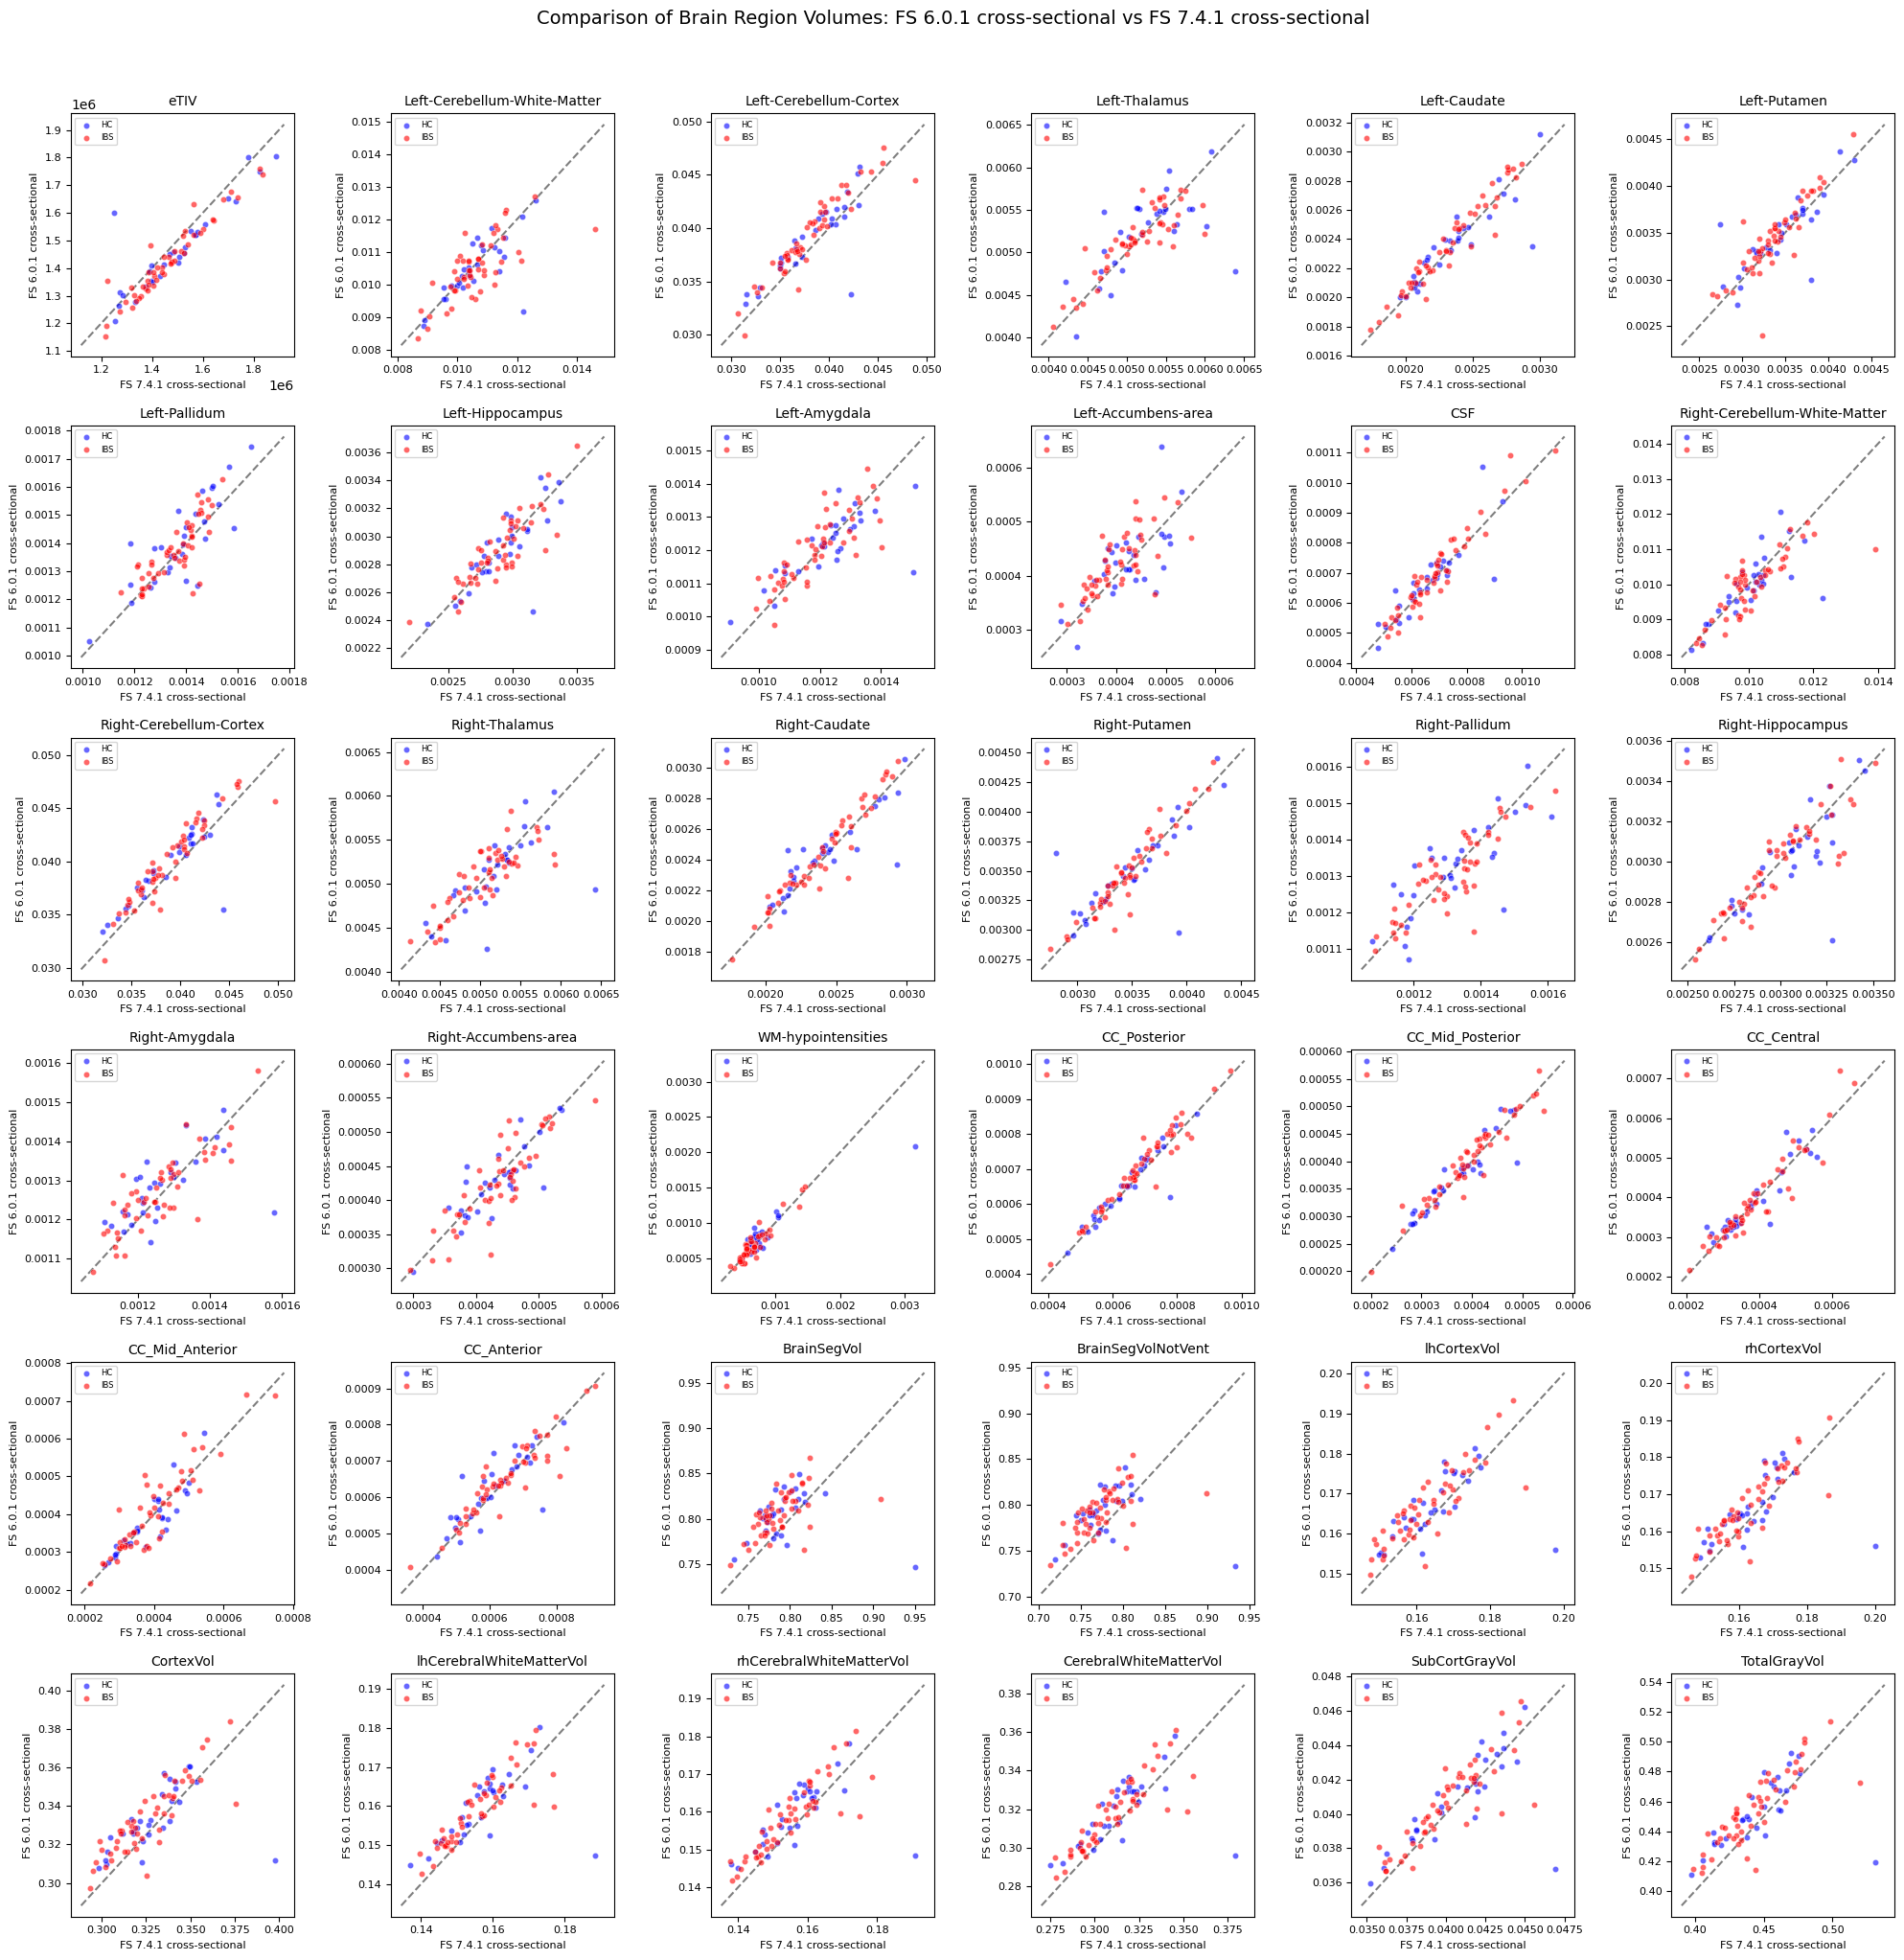

In [84]:
# Example usage:
# Compare FS 6.0.1 vs FS 7.4.1 cross
fig1 = compare_freesurfer_versions(
    df_fs6_cross_etiv_normalized, 
    df_fs7_cross_etiv_normalized,
    'FS 6.0.1 cross-sectional',
    'FS 7.4.1 cross-sectional'
)
plt.show()

fig1.savefig('../figs/fs6_cross_vs_fs7_cross_version_comparison.png', dpi=300)

# Overleaf
#fig1.savefig('/Users/arvid/Dropbox/Apps/Overleaf/Evaluation_of_brain_morphometry_and_clinical_data_in_IBS_diagnostics/figs/fs6_cross_vs_fs7_cross_version_comparison.png', dpi=300)


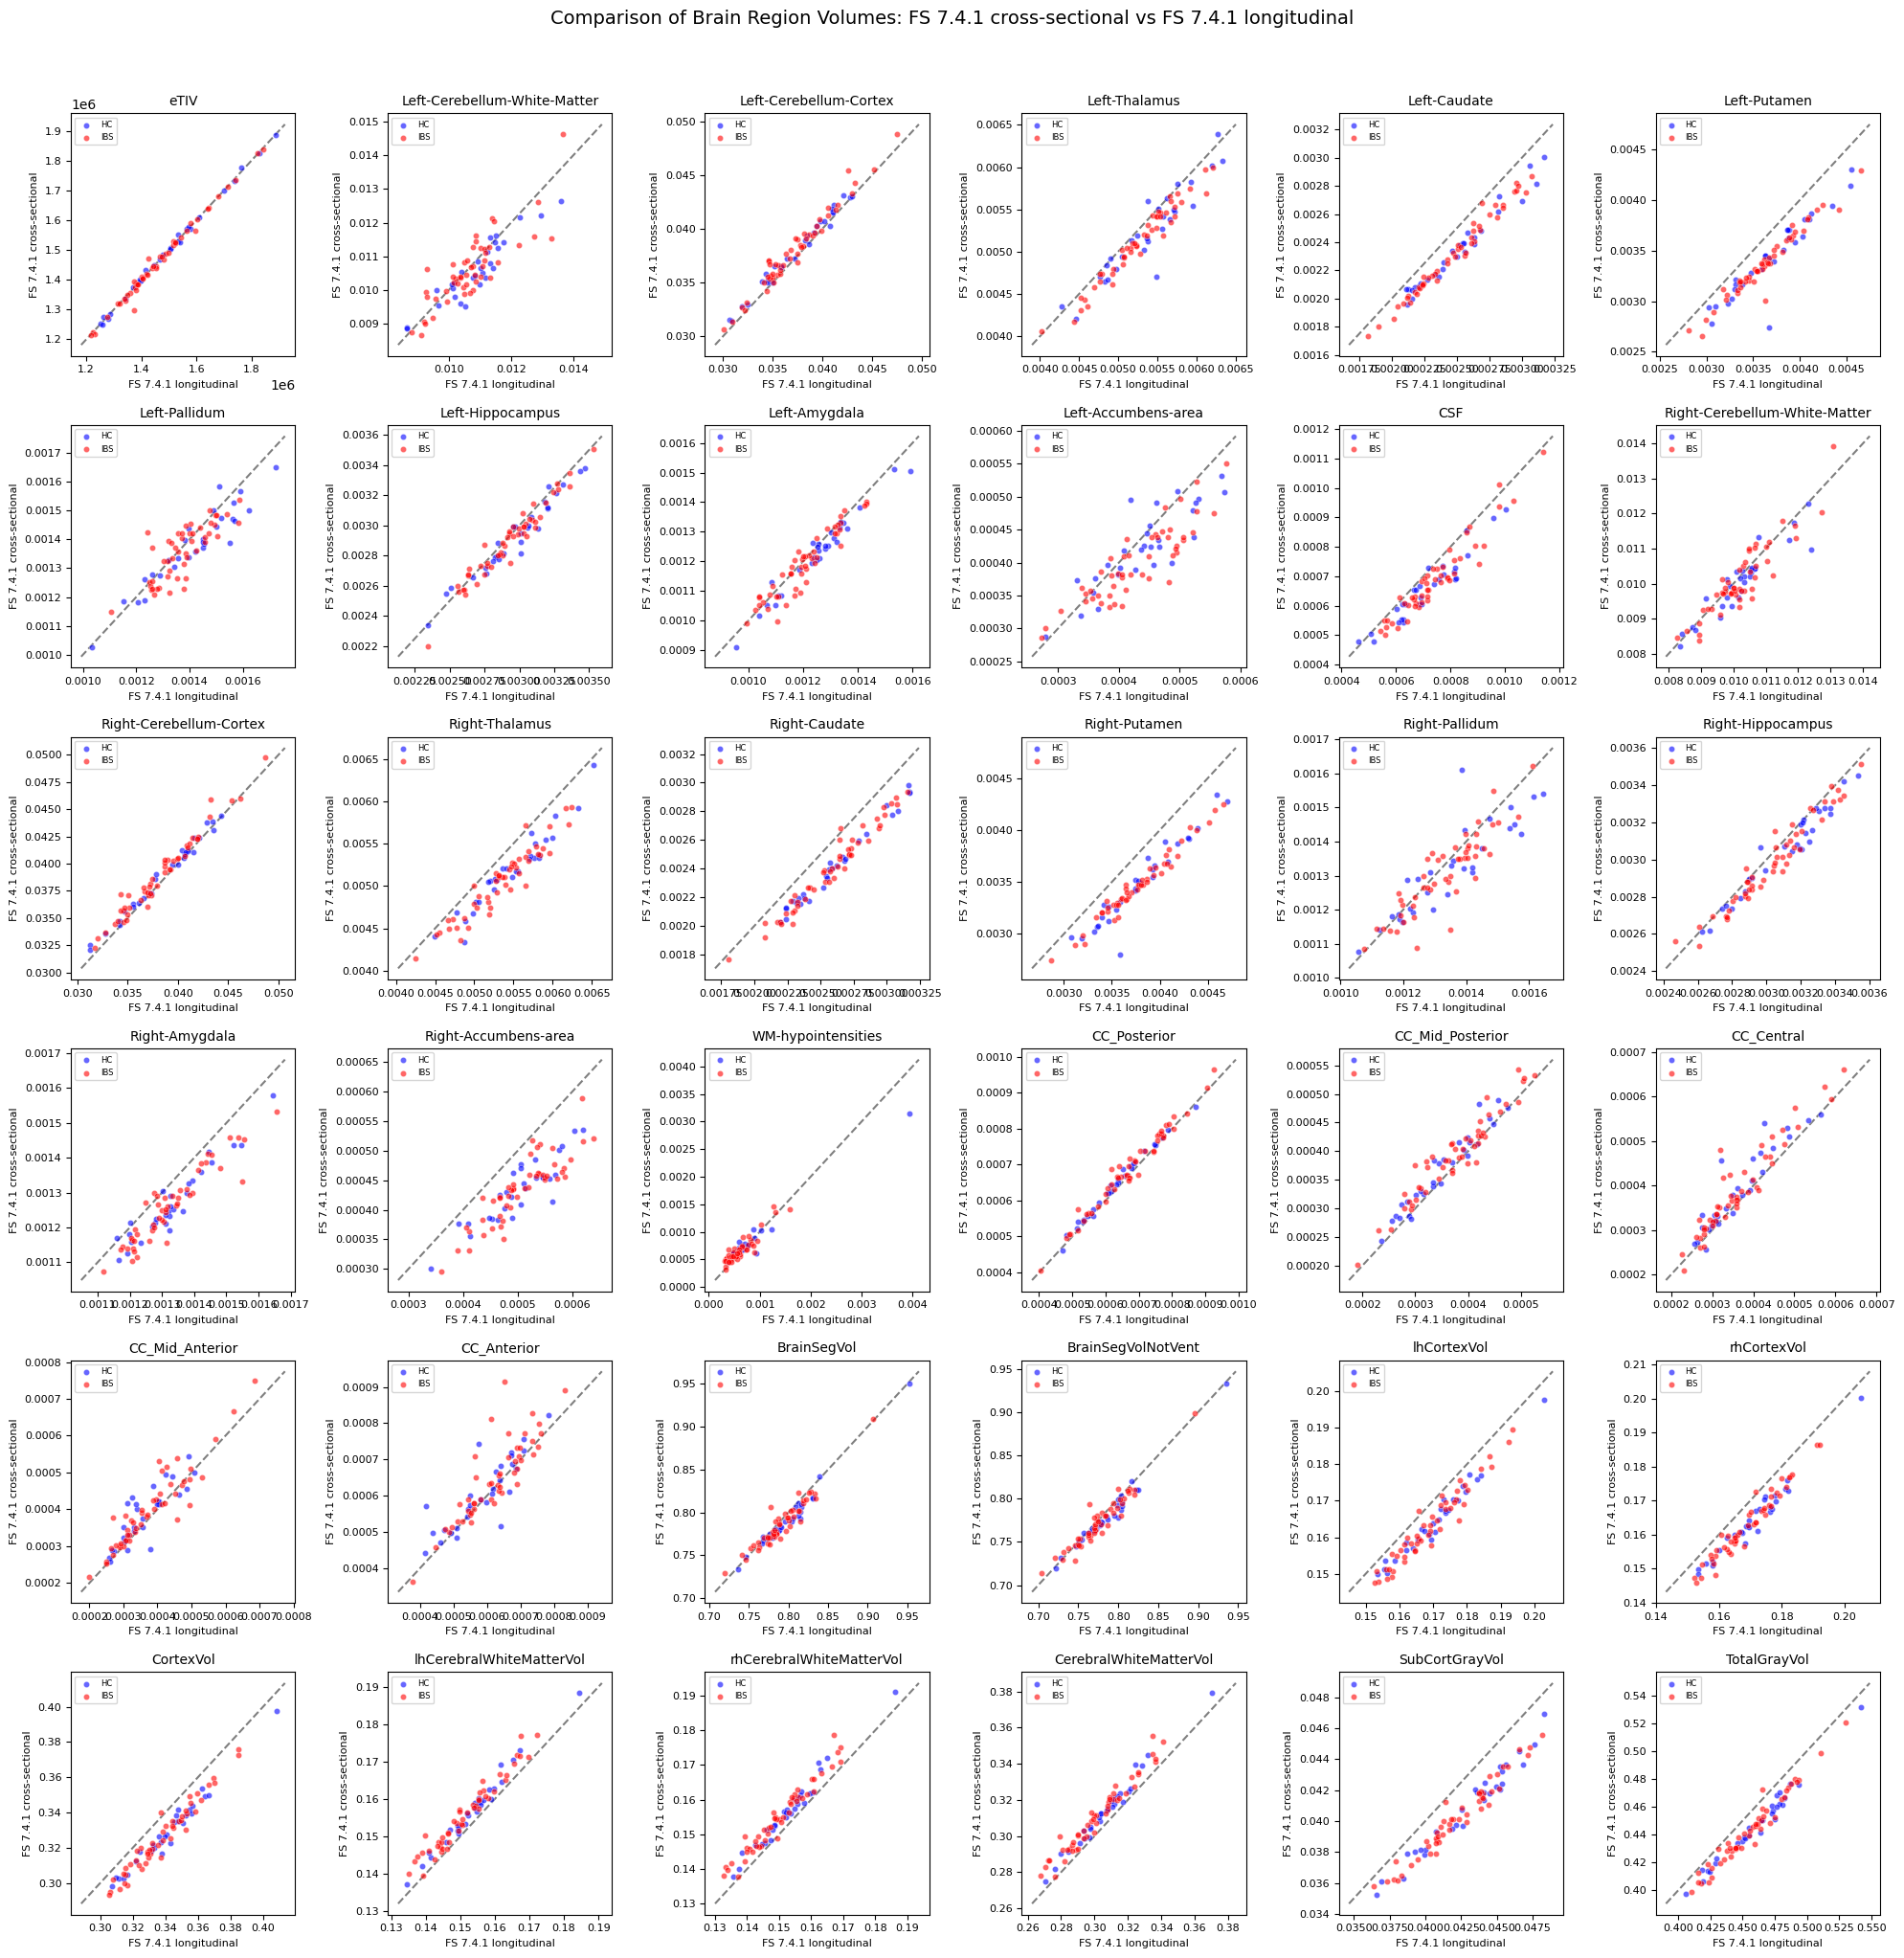

In [85]:
# Compare FS 7.4.1 cross vs long
fig2 = compare_freesurfer_versions(
    df_fs7_cross_etiv_normalized,
    df_fs7_long_etiv_normalized,
    'FS 7.4.1 cross-sectional',
    'FS 7.4.1 longitudinal'
)
plt.show()

# Save the figure
fig2.savefig('../figs/fs7_cross_vs_fs7_long_version_comparison.png', dpi=300)

# Overleaf
#fig2.savefig('/Users/arvid/Dropbox/Apps/Overleaf/Evaluation_of_brain_morphometry_and_clinical_data_in_IBS_diagnostics/figs/fs7_cross_vs_fs7_long_version_comparison.png', dpi=300)



In [86]:
# Create a function to generate a LaTeX table comparing the normalized volumes 
# between FS 6.0.1 and FS 7.4.1, grouped by HC and IBS

def create_comparison_table(df6, df7):
    # Skip these columns in comparison
    skip_cols = ['Subject', 'Group', 'eTIV']
    
    # Initialize lists to store results
    rows = []
    
    for col in df6.columns:
        if col not in skip_cols:
            # Calculate stats for HC group
            hc_6_stats = df6[df6['Group'] == 'HC'][col].agg(['mean', 'std'])
            hc_7_stats = df7[df7['Group'] == 'HC'][col].agg(['mean', 'std'])
            
            # Calculate stats for IBS group
            ibs_6_stats = df6[df6['Group'] == 'IBS'][col].agg(['mean', 'std'])
            ibs_7_stats = df7[df7['Group'] == 'IBS'][col].agg(['mean', 'std'])
            
            # Add row to results
            rows.append([
                col,
                f"{hc_6_stats['mean']:.6f}",
                f"{hc_6_stats['std']:.6f}",
                f"{ibs_6_stats['mean']:.6f}",
                f"{ibs_6_stats['std']:.6f}",
                f"{hc_7_stats['mean']:.6f}",
                f"{hc_7_stats['std']:.6f}",
                f"{ibs_7_stats['mean']:.6f}",
                f"{ibs_7_stats['std']:.6f}"
            ])
    
    # Create LaTeX table
    latex_table = "\\begin{table}[H]\n\\setlength{\\tabcolsep}{5pt}\n\\scriptsize\n\\centering\n\\caption{Comparison of Brain Region Volumes in IBS Patients and Healthy Controls, Bergen Cohort}\n"
    latex_table += "\\begin{tabular}{l|cc|cc|cc|cc}\n\\hline\n"
    latex_table += " & \\multicolumn{4}{c|}{FS 6.0.1} & \\multicolumn{4}{c}{FS 7.4.1} \\\\\n"
    latex_table += " & \\multicolumn{2}{c|}{HC (N=29)} & \\multicolumn{2}{c|}{IBS (N=49)} & \\multicolumn{2}{c|}{HC (N=29)} & \\multicolumn{2}{c}{IBS (N=49)} \\\\\n"
    latex_table += "Brain Region & Mean & SD & Mean & SD & Mean & SD & Mean & SD \\\\\n\\hline\n"
    
    for row in rows:
        latex_table += " & ".join(row) + " \\\\\n"
    
    latex_table += "\\hline\n\\end{tabular}\n\\label{tab:version_comparison}\n\\end{table}"
    
    return latex_table

# Generate the table
table = create_comparison_table(df_fs6_cross_etiv_normalized, df_fs7_cross_etiv_normalized)
print(table)

\begin{table}[H]
\setlength{\tabcolsep}{5pt}
\scriptsize
\centering
\caption{Comparison of Brain Region Volumes in IBS Patients and Healthy Controls, Bergen Cohort}
\begin{tabular}{l|cc|cc|cc|cc}
\hline
 & \multicolumn{4}{c|}{FS 6.0.1} & \multicolumn{4}{c}{FS 7.4.1} \\
 & \multicolumn{2}{c|}{HC (N=29)} & \multicolumn{2}{c|}{IBS (N=49)} & \multicolumn{2}{c|}{HC (N=29)} & \multicolumn{2}{c}{IBS (N=49)} \\
Brain Region & Mean & SD & Mean & SD & Mean & SD & Mean & SD \\
\hline
Left-Cerebellum-White-Matter & 0.010496 & 0.000915 & 0.010483 & 0.000924 & 0.010603 & 0.000932 & 0.010607 & 0.001027 \\
Left-Cerebellum-Cortex & 0.038939 & 0.003435 & 0.039314 & 0.003733 & 0.038066 & 0.003526 & 0.038056 & 0.003684 \\
Left-Thalamus & 0.005232 & 0.000464 & 0.005144 & 0.000393 & 0.005236 & 0.000522 & 0.005114 & 0.000458 \\
Left-Caudate & 0.002356 & 0.000259 & 0.002355 & 0.000306 & 0.002346 & 0.000283 & 0.002317 & 0.000294 \\
Left-Putamen & 0.003479 & 0.000385 & 0.003441 & 0.000386 & 0.003438 & 0.000396 

In [87]:
# Save the table to a LaTeX file
with open('../latex/tables/fs6_cross_vs_fs7_cross_version_comparison_table.tex', 'w') as f:
    f.write(table)


In [88]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

print(f"Mean eTIV FS6:\n{df_fs6_cross_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS6:\n{df_fs6_cross_etiv_normalized.groupby('Group')['eTIV'].std()}")
print(f"\nMean eTIV FS7:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS7:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].std()}")

pd.set_option('display.float_format', lambda x: '%.6f' % x)

Mean eTIV FS6:
Group
HC    1468820.2
IBS   1426237.4
Name: eTIV, dtype: float64

Std eTIV FS6:
Group
HC    155501.4
IBS   136412.8
Name: eTIV, dtype: float64

Mean eTIV FS7:
Group
HC    1494273.2
IBS   1462310.8
Name: eTIV, dtype: float64

Std eTIV FS7:
Group
HC    171472.3
IBS   144145.1
Name: eTIV, dtype: float64


In [89]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

print(f"Mean eTIV FS7-cross:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS7-cross:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].std()}")
print(f"\nMean eTIV FS7-long:\n{df_fs7_long_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS7-long:\n{df_fs7_long_etiv_normalized.groupby('Group')['eTIV'].std()}")

pd.set_option('display.float_format', lambda x: '%.6f' % x)

Mean eTIV FS7-cross:
Group
HC    1494273.2
IBS   1462310.8
Name: eTIV, dtype: float64

Std eTIV FS7-cross:
Group
HC    171472.3
IBS   144145.1
Name: eTIV, dtype: float64

Mean eTIV FS7-long:
Group
HC    1492943.7
IBS   1464197.2
Name: eTIV, dtype: float64

Std eTIV FS7-long:
Group
HC    171477.7
IBS   143328.1
Name: eTIV, dtype: float64


In [90]:
# Make a function to calculate Group, Region, N, Mean, SD from df_fs6_cross_etiv_normalize and df_fs7_cross_etiv_normalize

def calculate_group_region_mean_sd(df_normalized):
    """
    Calculate Group, Region, N, Mean, SD from normalized dataframes
    """
    # Skip these columns in calculations
    skip_cols = ['Subject', 'Group', 'eTIV']
    
    # Calculate mean and SD for each group and region   
    results = []    
    for group in ['HC', 'IBS']:
        group_data = df_normalized[df_normalized['Group'] == group]
        
        # Calculate mean and SD for each region
        for region in df_normalized.columns:
            if region not in skip_cols:
                mean_val = group_data[region].mean()
                sd_val = group_data[region].std()
                
                results.append({
                    'Group': group,
                    'Region': region,
                    'N': len(group_data),
                    'Mean': mean_val,
                    'SD': sd_val
                })

    # Convert results to DataFrame
    df_results = pd.DataFrame(results)

    # Display results
    # print("eTIV-normalized regional volumes in our sample of 78 subjects:") 
    return df_results

# Calculate statistics for both versions
df_fs6_cross_etiv_normalized_group_region_mean_sd = calculate_group_region_mean_sd(df_fs6_cross_etiv_normalized)
df_fs7_cross_etiv_normalized_group_region_mean_sd = calculate_group_region_mean_sd(df_fs7_cross_etiv_normalized)
df_fs7_long_etiv_normalized_group_region_mean_sd = calculate_group_region_mean_sd(df_fs7_long_etiv_normalized)


In [91]:
# Display first few rows of results
print("\nFS 6.0.1 Statistics:")
# print(df_fs6_cross_etiv_normalized_group_region_mean_sd.head())
df_fs6_cross_etiv_normalized_group_region_mean_sd



FS 6.0.1 Statistics:


Group                        Region   N     Mean       SD
0     HC  Left-Cerebellum-White-Matter  29 0.010496 0.000915
1     HC        Left-Cerebellum-Cortex  29 0.038939 0.003435
2     HC                 Left-Thalamus  29 0.005232 0.000464
3     HC                  Left-Caudate  29 0.002356 0.000259
4     HC                  Left-Putamen  29 0.003479 0.000385
..   ...                           ...  ..      ...      ...
65   IBS      lhCerebralWhiteMatterVol  49 0.159148 0.008757
66   IBS      rhCerebralWhiteMatterVol  49 0.158267 0.009384
67   IBS        CerebralWhiteMatterVol  49 0.317415 0.018079
68   IBS                SubCortGrayVol  49 0.040629 0.002364
69   IBS                  TotalGrayVol  49 0.453961 0.024324

[70 rows x 5 columns]

In [92]:
print("\nFS 7.4.1 Statistics (cross):")
df_fs7_cross_etiv_normalized_group_region_mean_sd


FS 7.4.1 Statistics (cross):


Group                        Region   N     Mean       SD
0     HC  Left-Cerebellum-White-Matter  29 0.010603 0.000932
1     HC        Left-Cerebellum-Cortex  29 0.038066 0.003526
2     HC                 Left-Thalamus  29 0.005236 0.000522
3     HC                  Left-Caudate  29 0.002346 0.000283
4     HC                  Left-Putamen  29 0.003438 0.000396
..   ...                           ...  ..      ...      ...
65   IBS      lhCerebralWhiteMatterVol  49 0.155820 0.009472
66   IBS      rhCerebralWhiteMatterVol  49 0.154840 0.009950
67   IBS        CerebralWhiteMatterVol  49 0.310659 0.019351
68   IBS                SubCortGrayVol  49 0.040194 0.002433
69   IBS                  TotalGrayVol  49 0.443252 0.025556

[70 rows x 5 columns]

In [93]:
print("\nFS 7.4.1 Statistics (long):")
df_fs7_long_etiv_normalized_group_region_mean_sd



FS 7.4.1 Statistics (long):


Group                        Region   N     Mean       SD
0     HC  Left-Cerebellum-White-Matter  29 0.010888 0.001076
1     HC        Left-Cerebellum-Cortex  29 0.037438 0.003633
2     HC                 Left-Thalamus  29 0.005385 0.000517
3     HC                  Left-Caudate  29 0.002506 0.000313
4     HC                  Left-Putamen  29 0.003702 0.000418
..   ...                           ...  ..      ...      ...
65   IBS      lhCerebralWhiteMatterVol  49 0.151551 0.009309
66   IBS      rhCerebralWhiteMatterVol  49 0.150025 0.009752
67   IBS        CerebralWhiteMatterVol  49 0.301576 0.018991
68   IBS                SubCortGrayVol  49 0.042213 0.002739
69   IBS                  TotalGrayVol  49 0.455681 0.025742

[70 rows x 5 columns]

### Version Analyzer  (effect sizes and consistency scores)

A more penetrating reproducibility analysis is computing effect sizes from the Skrobisz cohort on the x-axis against the Bergen cohort on the y-axis, with a diagonal reference line indicating perfect agreement. We are here using Cohen's d values for region-wise effect size which are a standardized measure of the difference between means. More specifically, for each eTIV-normalized brain region volume and cohort we are calculating the pooled standard deviation as:

\begin{equation*}
s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}}
\end{equation*}

where $n_1$ and $n_2$ are the sample sizes, and $s_1$ and $s_2$ are the standard deviations of the two groups, IBS and HC, respectively. Cohen's d effect size was then computed as:

\begin{equation*}
d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}
\end{equation*}

where $\bar{x}_1$ and $\bar{x}_2$ are the means of the two groups. The 95\% confidence interval for d was calculated using:

\begin{equation*}
CI_{95\%} = d \pm 1.96\sqrt{\frac{n_1+n_2}{n_1n_2} + \frac{d^2}{2(n_1+n_2)}}
\end{equation*}

where the standard error term accounts for both sampling variance and uncertainty in the effect size estimate.\\

An \textit{overall score} ($S$) for each brain region was computed as a composite measure combining three key components: binary sign consistency ($\sigma$), confidence interval overlap ($\omega$), and effect magnitude ($\epsilon$). Specifically, $S = \sigma + \omega + \epsilon$, where $\sigma$ equals 1 if the direction of effect is consistent between cohorts and 0 otherwise, $\omega$ equals 1 if the 95\% confidence intervals overlap and 0 otherwise, and $\epsilon$ represents the minimum absolute effect size observed across cohorts. This scoring system yields higher values for brain regions demonstrating consistent effects across cohorts, with the magnitude component ($\epsilon$) providing additional weight to regions showing stronger effects. A higher overall score thus indicates greater reliability and robustness of the observed effects across different study populations and analysis pipelines, offering a quantitative basis for identifying the most consistently replicated findings in brain morphometry.


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class VersionAnalyzer:
    # Define version names as class variables
    FS_601 = 'FS 6.0.1'
    FS_741 = 'FS 7.4.1'
    FS_741_CROSS = 'FS 7.4.1 cross'
    FS_741_LONG = 'FS 7.4.1 long'
    
    def __init__(self, df_v1, df_v2, v1_name=FS_601, v2_name=FS_741):
        self.df_v1 = df_v1
        self.df_v2 = df_v2
        self.v1_name = v1_name
        self.v2_name = v2_name
        
    def calculate_effect_sizes(self):
        versions = {
            self.v1_name: self.df_v1,
            self.v2_name: self.df_v2
        }
        
        results = []
        for version_name, df in versions.items():
            for region in df['Region'].unique():
                ibs_data = df[(df['Region'] == region) & (df['Group'] == 'IBS')]
                hc_data = df[(df['Region'] == region) & (df['Group'] == 'HC')]
                
                if len(ibs_data) == 0 or len(hc_data) == 0:
                    continue
                
                n1, n2 = ibs_data['N'].iloc[0], hc_data['N'].iloc[0]
                sd1, sd2 = ibs_data['SD'].iloc[0], hc_data['SD'].iloc[0]
                pooled_sd = np.sqrt(((n1-1)*sd1**2 + (n2-1)*sd2**2) / (n1+n2-2))
                
                d = (ibs_data['Mean'].iloc[0] - hc_data['Mean'].iloc[0]) / pooled_sd
                
                se = np.sqrt((n1+n2)/(n1*n2) + d**2/(2*(n1+n2)))
                ci_lower = d - 1.96*se
                ci_upper = d + 1.96*se
                
                results.append({
                    'version': version_name,
                    'region': region,
                    'effect_size': d,
                    'ci_lower': ci_lower,
                    'ci_upper': ci_upper,
                    'n_total': n1 + n2
                })
        
        return pd.DataFrame(results)
    
    
    def plot_effect_size_comparison_OLD(self, effect_sizes=None):
        if effect_sizes is None:
            effect_sizes = self.calculate_effect_sizes()
        
        effect_pivot = effect_sizes.pivot(index='region', 
                                        columns='version',
                                        values=['effect_size', 'ci_lower', 'ci_upper'])
        
        plt.figure(figsize=(12, 8))
        plt.scatter(effect_pivot['effect_size'][self.v1_name],
                   effect_pivot['effect_size'][self.v2_name],
                   alpha=0.7)
        
        xlim = plt.xlim()
        ylim = plt.ylim()
        lims = [min(xlim[0], ylim[0]), max(xlim[1], ylim[1])]
        plt.plot(lims, lims, 'k--', alpha=0.5)
        
        for region in effect_pivot.index:
            plt.annotate(region, 
                        (effect_pivot['effect_size'][self.v1_name][region],
                         effect_pivot['effect_size'][self.v2_name][region]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8)
        
        plt.xlabel(f'Effect Size ({self.v1_name})')
        plt.ylabel(f'Effect Size ({self.v2_name})')
        plt.title(f'Effect Size Comparison Between {self.v1_name} and {self.v2_name}')
        plt.grid(True, alpha=0.3)
        
        return plt.gcf()
    

    def plot_effect_size_comparison(self, effect_sizes=None, save_path='../figs/'):
        """Create scatter plot comparing effect sizes between FreeSurfer versions"""
        if effect_sizes is None:
            effect_sizes = self.calculate_effect_sizes()
        
        # Pivot the data to get effect sizes for each version
        effect_pivot = effect_sizes.pivot(index='region', 
                                        columns='version',
                                        values='effect_size')
        
        # Create figure with larger size
        plt.figure(figsize=(15, 10))
        
        # Create scatter plot with black markers
        plt.scatter(effect_pivot[self.v1_name],
                effect_pivot[self.v2_name],
                alpha=0.7,
                color='black')
        
        # Add diagonal line
        xlim = plt.xlim()
        ylim = plt.ylim()
        lims = [min(xlim[0], ylim[0]), max(xlim[1], ylim[1])]
        plt.plot(lims, lims, 'k--', alpha=0.5)
        
        # Add labels with adjusttext for automatic label placement
        from adjustText import adjust_text
        texts = []
        
        for region in effect_pivot.index:
            texts.append(plt.text(effect_pivot[self.v1_name][region],
                                effect_pivot[self.v2_name][region],
                                region,
                                fontsize=8))
        
        # Adjust text positions to minimize overlap
        adjust_text(texts,
                arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
                expand_points=(1.5, 1.5),
                force_points=(0.5, 0.5))
        
        plt.xlabel(f'Effect Size ({self.v1_name})')
        plt.ylabel(f'Effect Size ({self.v2_name})')
        plt.title('Effect Size Comparison Between FreeSurfer Versions')
        plt.grid(True, alpha=0.3)
        
        # Ensure labels don't get cut off
        plt.tight_layout()
        
        return plt.gcf()


    
    def calculate_replication_metrics(self, effect_sizes=None):
        if effect_sizes is None:
            effect_sizes = self.calculate_effect_sizes()
        
        v1_data = effect_sizes[effect_sizes['version'] == self.v1_name]
        v2_data = effect_sizes[effect_sizes['version'] == self.v2_name]
        
        comparison_data = pd.merge(
            v1_data, 
            v2_data, 
            on='region', 
            suffixes=('_v1', '_v2')
        )
        
        correlation = stats.pearsonr(
            comparison_data['effect_size_v1'],
            comparison_data['effect_size_v2']
        )
        
        sign_consistency = np.mean(
            np.sign(comparison_data['effect_size_v1']) ==
            np.sign(comparison_data['effect_size_v2'])
        )
        
        ci_overlap = np.mean(
            (comparison_data['ci_lower_v1'] <= comparison_data['ci_upper_v2']) &
            (comparison_data['ci_lower_v2'] <= comparison_data['ci_upper_v1'])
        )

        consistency_scores = pd.DataFrame({
            'region': comparison_data['region'],
            'sign_match': np.sign(comparison_data['effect_size_v1']) ==
                         np.sign(comparison_data['effect_size_v2']),
            'effect_magnitude': np.minimum(
                np.abs(comparison_data['effect_size_v1']),
                np.abs(comparison_data['effect_size_v2'])
            ),
            'ci_overlap': (comparison_data['ci_lower_v1'] <= 
                          comparison_data['ci_upper_v2']) &
                         (comparison_data['ci_lower_v2'] <= 
                          comparison_data['ci_upper_v1'])
        })
        
        consistency_scores['overall_score'] = (
            consistency_scores['sign_match'].astype(int) +
            consistency_scores['ci_overlap'].astype(int) +
            consistency_scores['effect_magnitude']
        )
        
        most_consistent = consistency_scores.sort_values('overall_score', 
                                                       ascending=False)
        
        return {
            'correlation': correlation[0],
            'correlation_p': correlation[1],
            'sign_consistency': sign_consistency,
            'ci_overlap_rate': ci_overlap,
            'most_consistent_regions': most_consistent,
            'comparison_data': comparison_data
        }
    
    def plot_region_rankings(self):
        metrics = self.calculate_replication_metrics()
        consistent_regions = metrics['most_consistent_regions']
        
        plt.figure(figsize=(12, len(consistent_regions)*0.4))
        sns.barplot(data=consistent_regions,
                   y='region',
                   x='overall_score',
                   palette='viridis')
        plt.title(f'Regions Ranked by Replication Consistency ({self.v1_name} vs {self.v2_name})')
        plt.xlabel('Consistency Score')
        plt.tight_layout()
        
        return plt.gcf()

In [95]:
# For comparing FS 6.0.1 vs FS 7.4.1
analyzer_601_741 = VersionAnalyzer(
    df_fs6_cross_etiv_normalized_group_region_mean_sd,
    df_fs7_cross_etiv_normalized_group_region_mean_sd,
    VersionAnalyzer.FS_601,
    VersionAnalyzer.FS_741
)

In [96]:
# For comparing FS 7.4.1 cross vs long
analyzer_741_cross_long = VersionAnalyzer(
    df_fs7_cross_etiv_normalized_group_region_mean_sd,
    df_fs7_long_etiv_normalized_group_region_mean_sd,
    VersionAnalyzer.FS_741_CROSS,
    VersionAnalyzer.FS_741_LONG
)

COMPARING FS 6.0.1 VS FS 7.4.1


/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_27976/3216802924.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=consistent_regions,



Correlation: 0.8745 (p=0.0000)
Sign consistency: 74.3%
CI overlap rate: 100.0%

Top 5 most consistent regions:
                region  sign_match  effect_magnitude  ci_overlap  \
21    CC_Mid_Posterior        True          0.379855        True   
20        CC_Posterior        True          0.374232        True   
19  WM-hypointensities        True          0.342145        True   
24         CC_Anterior        True          0.275451        True   
9                  CSF        True          0.241790        True   

    overall_score  
21       2.379855  
20       2.374232  
19       2.342145  
24       2.275451  
9        2.241790  


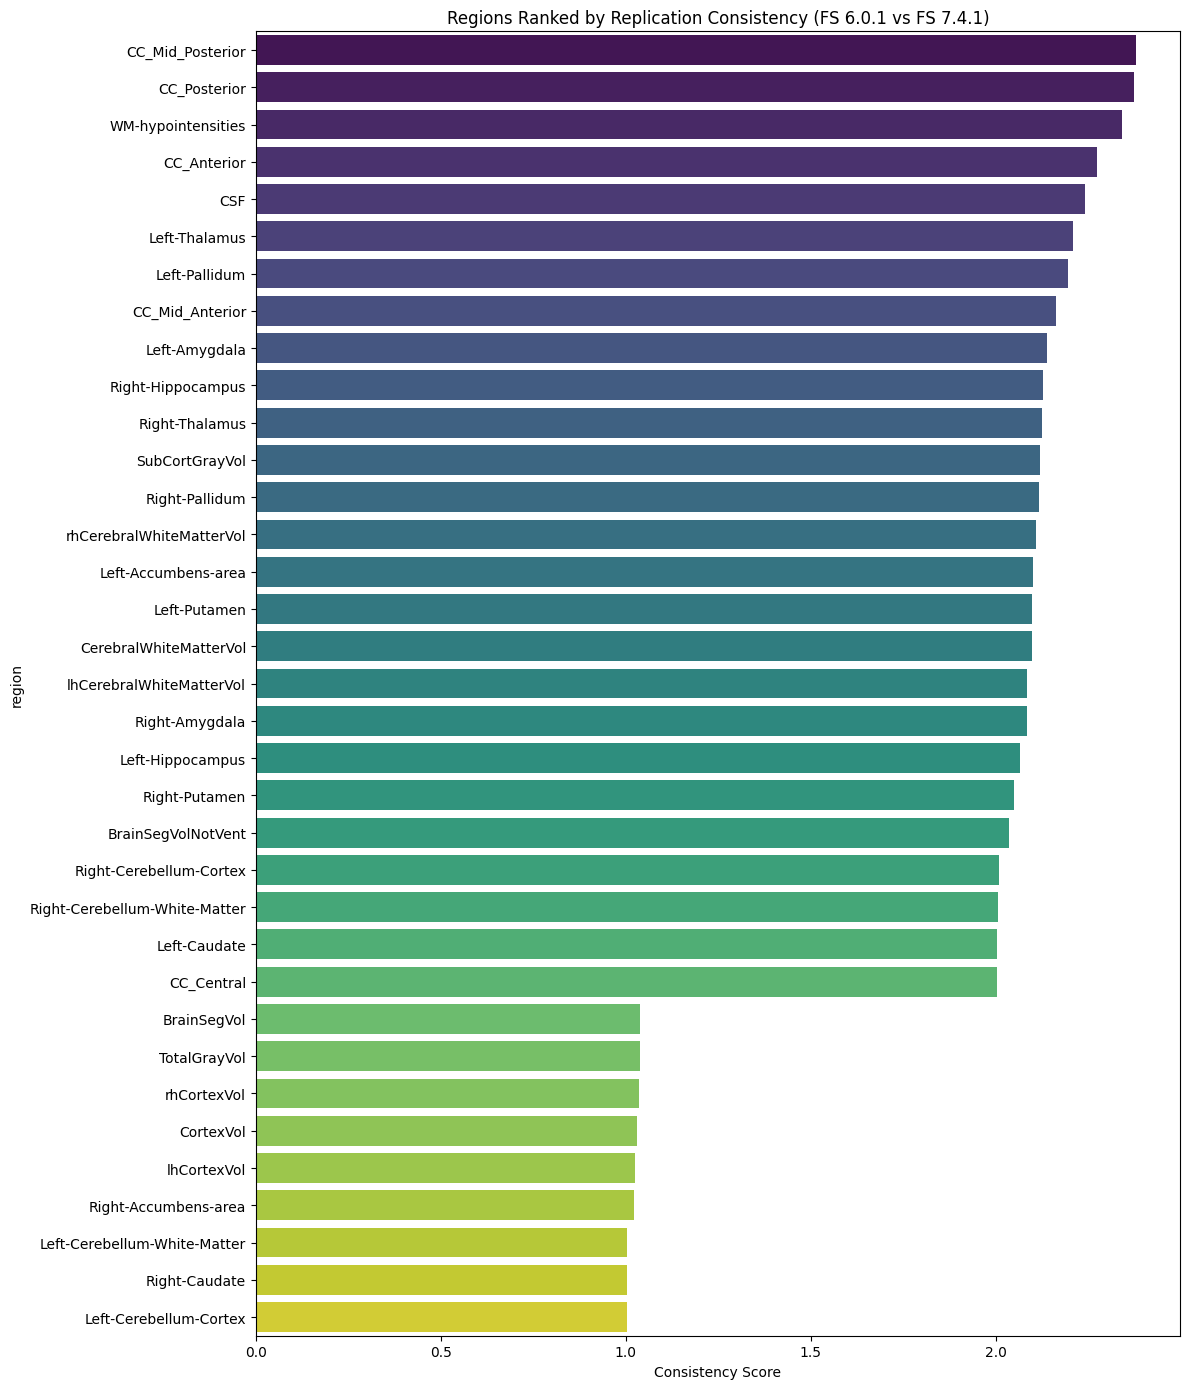

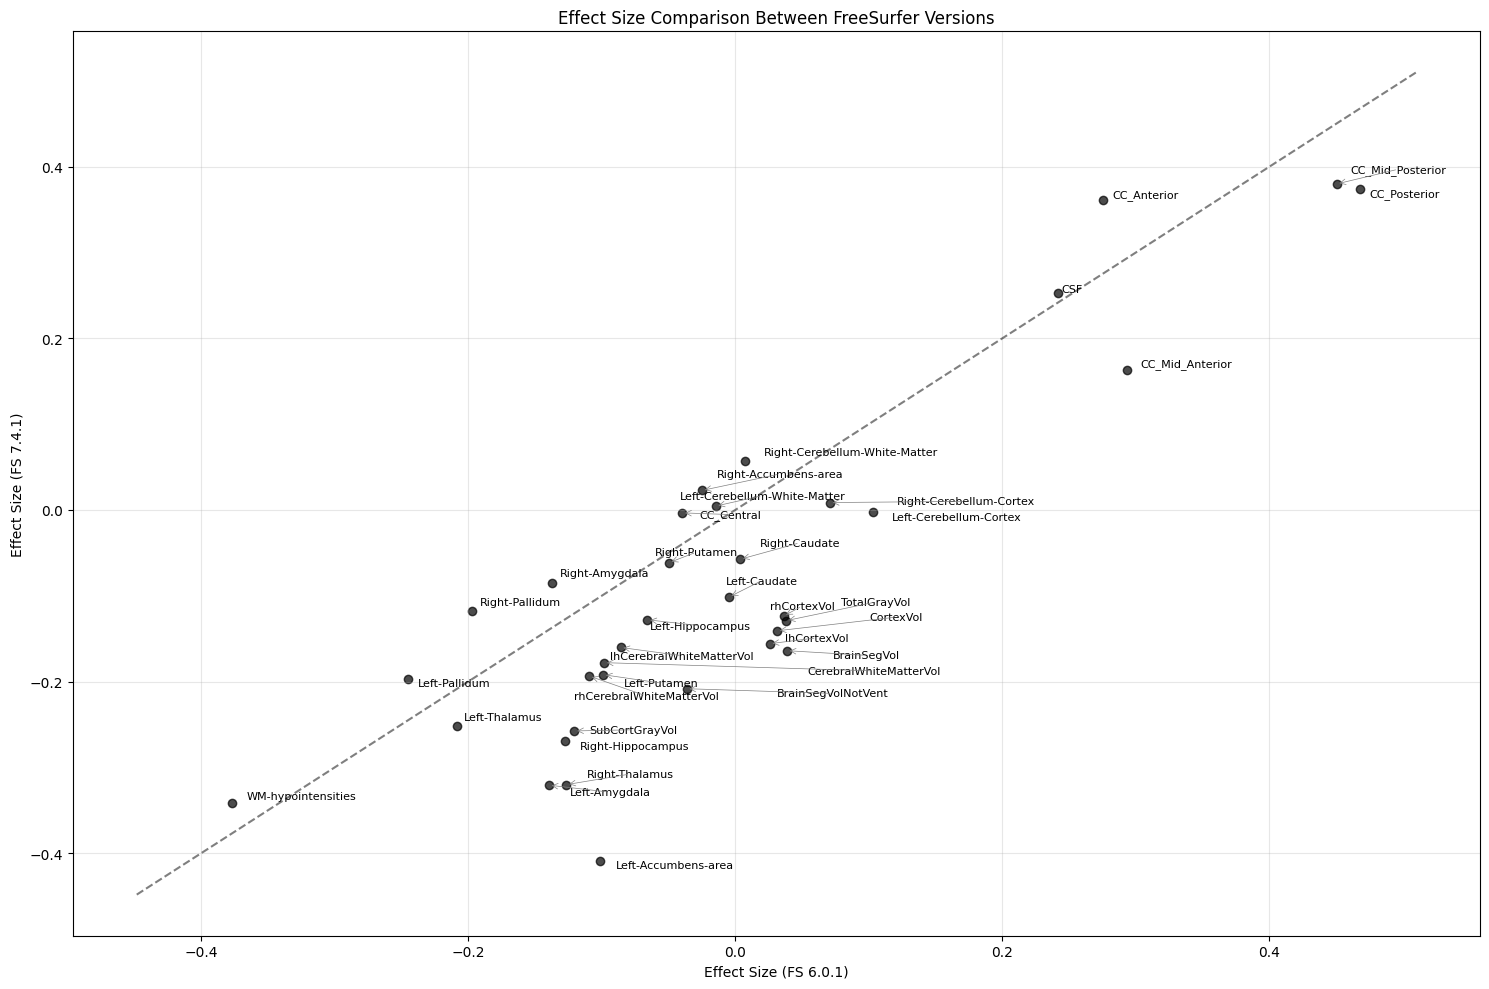

<Figure size 640x480 with 0 Axes>



COMPARING FS 7.4.1 CROSS VS LONGITUDINAL


/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_27976/3216802924.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=consistent_regions,



Correlation: 0.9385 (p=0.0000)
Sign consistency: 94.3%
CI overlap rate: 100.0%

Top 5 most consistent regions:
                region  sign_match  effect_magnitude  ci_overlap  \
24         CC_Anterior        True          0.356996        True   
21    CC_Mid_Posterior        True          0.345026        True   
20        CC_Posterior        True          0.342494        True   
19  WM-hypointensities        True          0.334800        True   
7        Left-Amygdala        True          0.320769        True   

    overall_score  
24       2.356996  
21       2.345026  
20       2.342494  
19       2.334800  
7        2.320769  


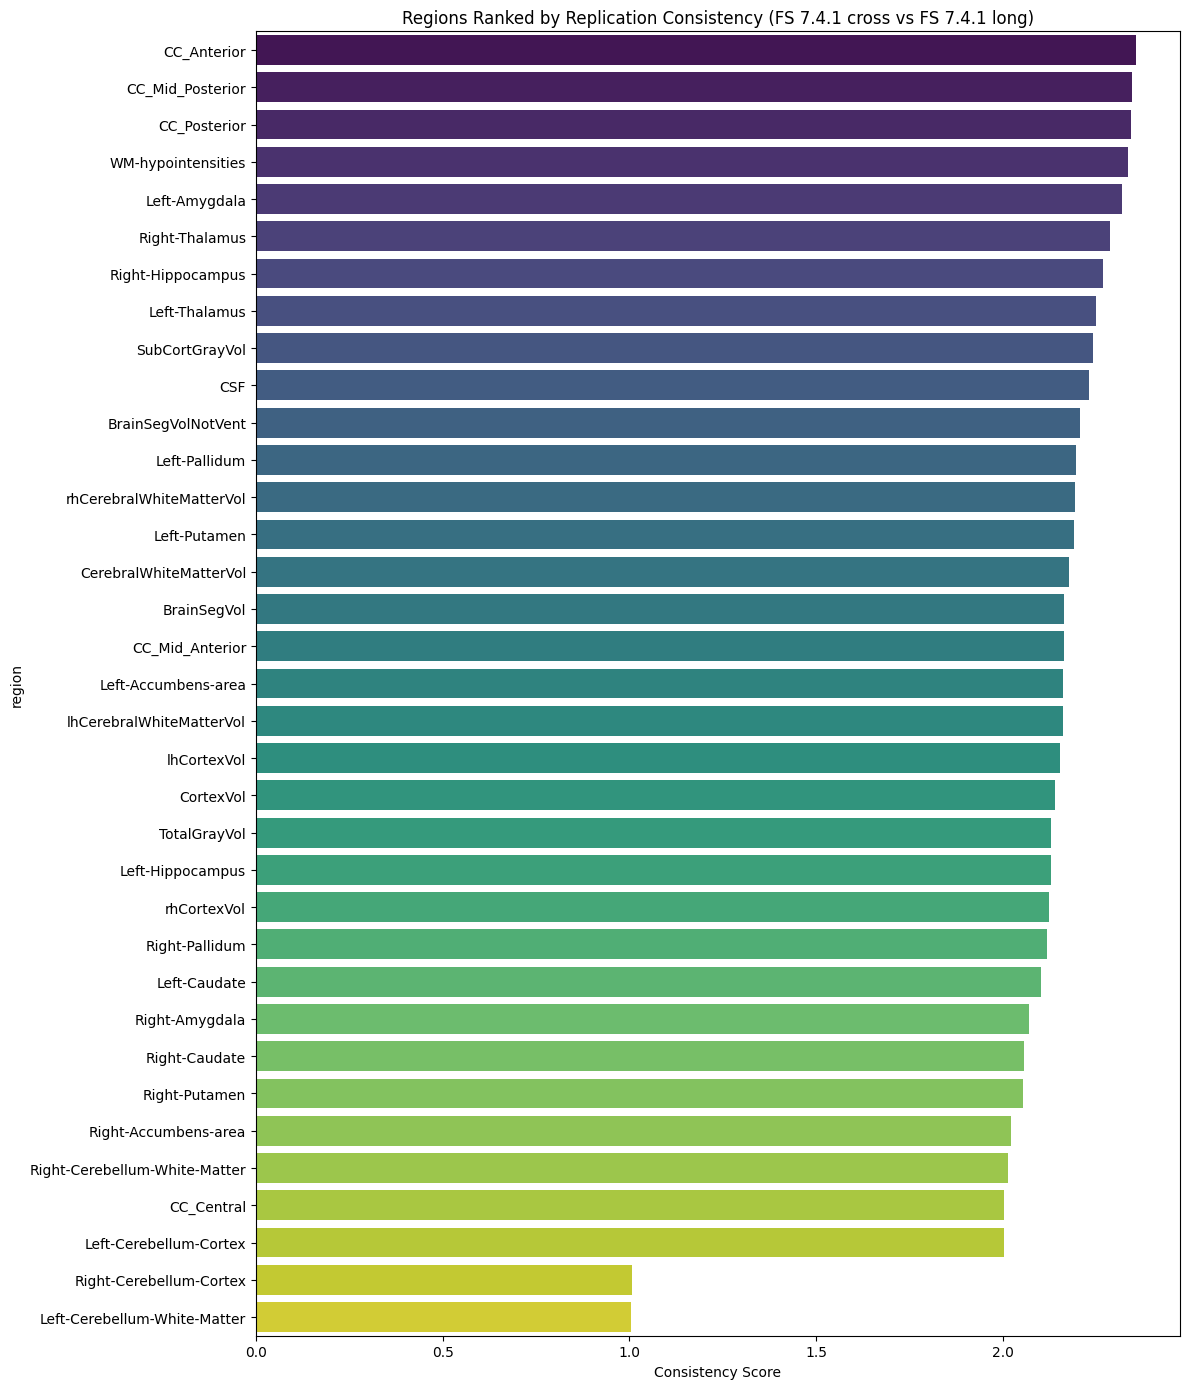

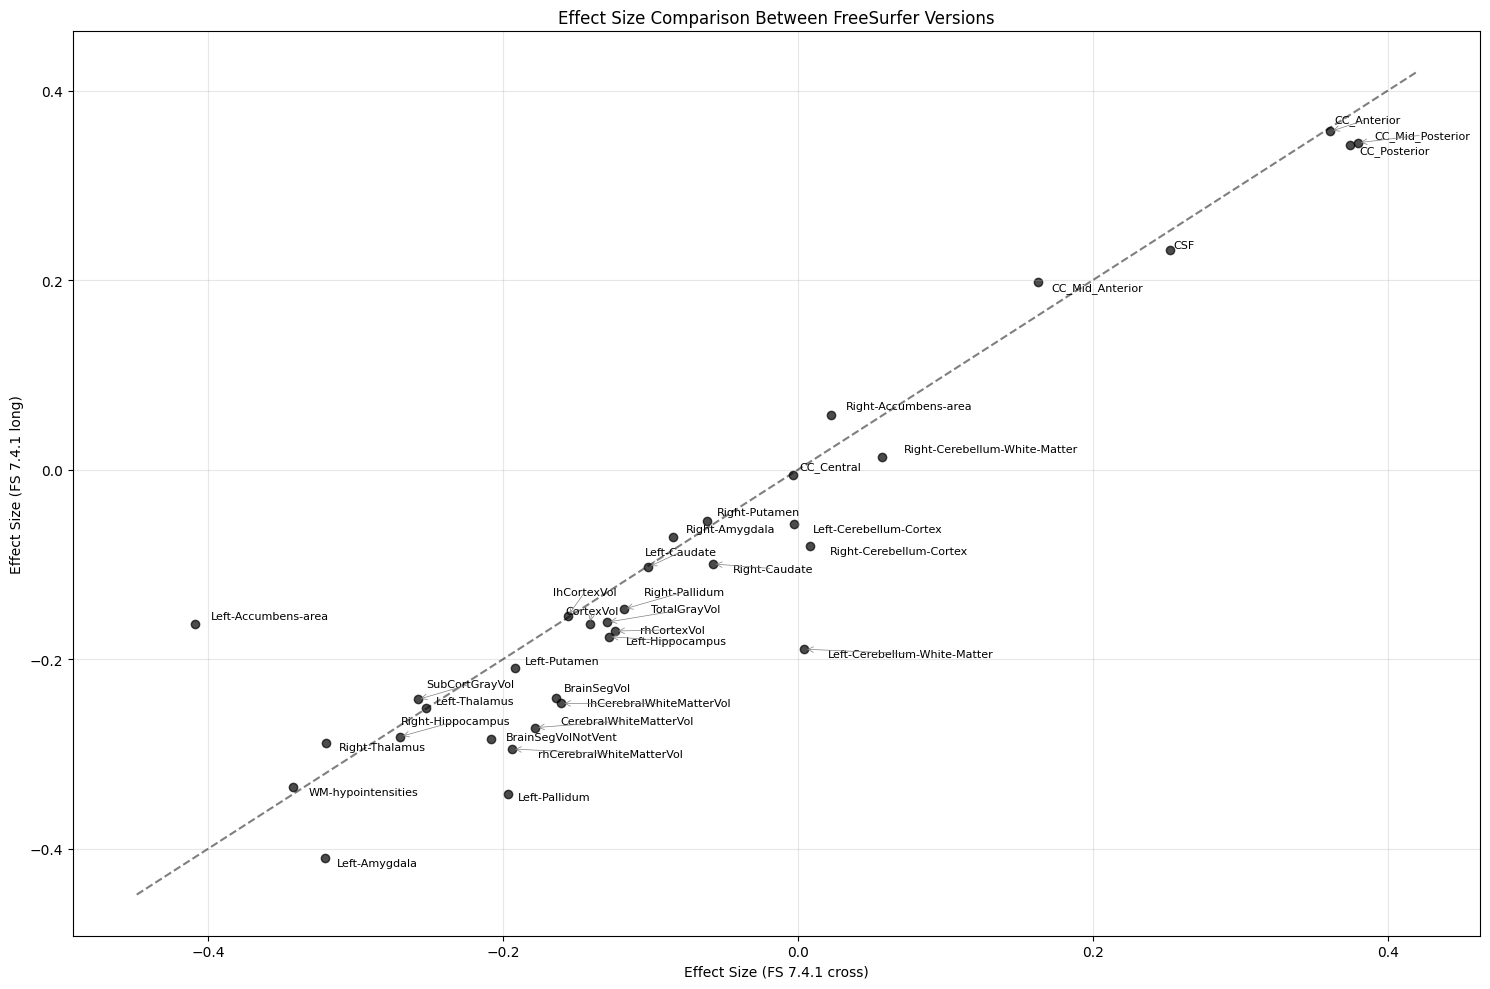

<Figure size 640x480 with 0 Axes>

In [97]:
def analyze_versions(df_v1, df_v2, v1_name, v2_name):
    """
    Analyze two FreeSurfer versions and return metrics and plots
    
    Parameters:
    -----------
    df_v1, df_v2 : pandas DataFrames
        Data from two FreeSurfer versions
    v1_name, v2_name : str
        Names of the FreeSurfer versions
    
    Returns:
    --------
    dict containing metrics and plots
    """
    # Create analyzer instance
    analyzer = VersionAnalyzer(df_v1, df_v2, v1_name, v2_name)
    
    # Calculate effect sizes
    effect_sizes = analyzer.calculate_effect_sizes()
    
    # Generate plots
    effect_comparison = analyzer.plot_effect_size_comparison(effect_sizes)
    ranking_plot = analyzer.plot_region_rankings()
    
    # Calculate metrics
    metrics = analyzer.calculate_replication_metrics(effect_sizes)
    
    return {
        'metrics': metrics,
        'effect_sizes': effect_sizes,
        'plots': {
            'effect_comparison': effect_comparison,
            'ranking_plot': ranking_plot
        }
    }

# Now run your analysis code for FS 6.0.1 vs FS 7.4.1
print("COMPARING FS 6.0.1 VS FS 7.4.1")
print("=" * 50)

results_601_741 = analyze_versions(
    df_fs6_cross_etiv_normalized_group_region_mean_sd,
    df_fs7_cross_etiv_normalized_group_region_mean_sd,
    VersionAnalyzer.FS_601,
    VersionAnalyzer.FS_741
)



# Print key metrics
metrics_601_741 = results_601_741['metrics']
print(f"\nCorrelation: {metrics_601_741['correlation']:.4f} (p={metrics_601_741['correlation_p']:.4f})")
print(f"Sign consistency: {metrics_601_741['sign_consistency']*100:.1f}%")
print(f"CI overlap rate: {metrics_601_741['ci_overlap_rate']*100:.1f}%")

print("\nTop 5 most consistent regions:")
print(metrics_601_741['most_consistent_regions'].head())

# Display plots for FS 6.0.1 vs FS 7.4.1
plt.figure(results_601_741['plots']['effect_comparison'].number)
plt.show()
plt.figure(results_601_741['plots']['ranking_plot'].number)
plt.show()

# Run analyses and display plots for FS 7.4.1 cross vs long
print("\n\nCOMPARING FS 7.4.1 CROSS VS LONGITUDINAL")
print("=" * 50)

results_741_cross_long = analyze_versions(
    df_fs7_cross_etiv_normalized_group_region_mean_sd,
    df_fs7_long_etiv_normalized_group_region_mean_sd,
    VersionAnalyzer.FS_741_CROSS,
    VersionAnalyzer.FS_741_LONG
)

# Print key metrics
metrics_741_cross_long = results_741_cross_long['metrics']
print(f"\nCorrelation: {metrics_741_cross_long['correlation']:.4f} (p={metrics_741_cross_long['correlation_p']:.4f})")
print(f"Sign consistency: {metrics_741_cross_long['sign_consistency']*100:.1f}%")
print(f"CI overlap rate: {metrics_741_cross_long['ci_overlap_rate']*100:.1f}%")

print("\nTop 5 most consistent regions:")
print(metrics_741_cross_long['most_consistent_regions'].head())

# Display plots for FS 7.4.1 cross vs long
plt.figure(results_741_cross_long['plots']['effect_comparison'].number)
plt.show()
plt.figure(results_741_cross_long['plots']['ranking_plot'].number)
plt.show()

# Save plots
results_601_741['plots']['effect_comparison'].savefig('../figs/effect_sizes_601_vs_741.png')
results_601_741['plots']['ranking_plot'].savefig('../figs/region_rankings_601_vs_741.png')
results_741_cross_long['plots']['effect_comparison'].savefig('../figs/effect_sizes_741_cross_vs_long.png')
results_741_cross_long['plots']['ranking_plot'].savefig('../figs/region_rankings_741_cross_vs_long.png')

# Close plots to free memory
plt.close('all')

For multivariate analyses (Objectives B-D in the paper), we first assessed multivariate normality using 
two complementary methods: Mardia’s test (examining skewness and kurtosis) and the 
more comprehensive Henze-Zirkler’s test, both implemented below. 

In [98]:
import numpy as np
import pandas as pd
import pingouin as pg
from scipy import stats
from scipy.stats import chi2

def mardia_test(X):
    """
    Compute Mardia's multivariate skewness and kurtosis tests
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        The data matrix.
    
    Returns
    -------
    dict
        Dictionary containing test statistics and p-values for skewness and kurtosis
    """
    n, p = X.shape
    # Calculate mean and centered data
    mean = np.mean(X, axis=0)
    centered = X - mean
    
    # Calculate covariance and its inverse
    S = np.cov(X, rowvar=False)
    S_inv = np.linalg.inv(S)
    
    # Calculate Mahalanobis distances
    d = np.sum(centered @ S_inv * centered, axis=1)
    
    # Calculate skewness
    b1p = np.mean([np.sum((centered[i] @ S_inv * centered[j])**3) 
                   for i in range(n) for j in range(n)])
    skew_stat = (n/6) * b1p
    skew_df = p * (p + 1) * (p + 2) / 6
    skew_p = 1 - chi2.cdf(skew_stat, skew_df)
    
    # Calculate kurtosis
    b2p = np.mean(d**2)
    kurt_stat = (b2p - p * (p + 2)) / np.sqrt(8 * p * (p + 2) / n)
    kurt_p = 2 * (1 - stats.norm.cdf(abs(kurt_stat)))
    
    return {
        'skewness_statistic': skew_stat,
        'skewness_p_value': skew_p,
        'kurtosis_statistic': kurt_stat,
        'kurtosis_p_value': kurt_p
    }

def henze_zirkler(X, alpha=0.05):
    """
    Perform the Henze-Zirkler test for multivariate normality with improved numerical stability.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        The data matrix.
    alpha : float, optional
        Significance level for the test (default is 0.05).
    
    Returns
    -------
    tuple
        (hz_statistic, p_value) or (np.nan, np.nan) if numerical issues occur
    """
    try:
        n, p = X.shape
        beta = 1.0 / np.sqrt(2.0)
        gamma = 1.0 / (2.0 * beta**2)
        
        # Compute the mean and covariance matrix
        mean = np.mean(X, axis=0)
        cov = np.cov(X, rowvar=False)
        
        # Compute the Mahalanobis distances with error checking
        try:
            inv_cov = np.linalg.inv(cov)
        except np.linalg.LinAlgError:
            print("Warning: Using pseudoinverse due to singular covariance matrix")
            inv_cov = np.linalg.pinv(cov)
            
        diff = X - mean
        mahalanobis_distances = np.sum(diff @ inv_cov * diff, axis=1)
        
        # Use log-space calculations to avoid overflow
        log_hz = -gamma * mahalanobis_distances
        hz_statistic = np.mean(np.exp(log_hz))
        
        # Compute the test statistic with stability checks
        denom = (1 + 2 * p * beta**2)**(-0.5)
        hz_statistic = (hz_statistic - (1 + p * beta**2)**(-0.5)) / denom
        hz_statistic *= n * (1 + 2 * p * beta**2)**0.5
        
        # Check for numerical issues
        if np.isnan(hz_statistic) or np.isinf(hz_statistic):
            print("Warning: Numerical issues in HZ statistic calculation")
            return np.nan, np.nan
        
        # Compute the p-value
        df = p * (p + 1) * (p + 2) / 6
        p_value = 1 - chi2.cdf(hz_statistic, df)
        
        return hz_statistic, p_value
        
    except Exception as e:
        print(f"Error in Henze-Zirkler calculation: {str(e)}")
        return np.nan, np.nan

def assess_multivariate_normality(dataframes_dict, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Assess multivariate normality using Mardia's and Henze-Zirkler's tests
    
    Parameters
    ----------
    dataframes_dict : dict
        Dictionary of dataframes to test
    skip_cols : list
        Columns to exclude from analysis
    
    Returns
    -------
    dict
        Dictionary containing test results for each dataframe
    """
    results = {}
    
    for name, df in dataframes_dict.items():
        print(f"\nAnalyzing {name}:")
        print("=" * 50)
        
        # Select features
        features = df[[col for col in df.columns 
                      if col not in skip_cols]].select_dtypes(include=[float, int])
        
        # Separate by group
        hc_data = features[df['Group'] == 'HC']
        ibs_data = features[df['Group'] == 'IBS']
        
        # Store results
        results[name] = {
            'full_sample': {},
            'HC': {},
            'IBS': {}
        }
        
        # Analyze full sample
        print("\nFull Sample Results:")
        try:
            mardia_results = mardia_test(features.values)
            hz_stat, hz_p = henze_zirkler(features.values)
            
            results[name]['full_sample'] = {
                'mardia': mardia_results,
                'hz_statistic': hz_stat,
                'hz_p_value': hz_p,
                'n_samples': len(features),
                'n_features': features.shape[1]
            }
            
            print("Mardia's Test:")
            print(f"Skewness: statistic={mardia_results['skewness_statistic']:.4f}, p={mardia_results['skewness_p_value']:.4e}")
            print(f"Kurtosis: statistic={mardia_results['kurtosis_statistic']:.4f}, p={mardia_results['kurtosis_p_value']:.4e}")
            print(f"\nHenze-Zirkler's Test:")
            print(f"Statistic: {hz_stat:.4f}, p-value: {hz_p:.4e}")
            
        except Exception as e:
            print(f"Error in full sample analysis: {str(e)}")
            results[name]['full_sample']['error'] = str(e)
        
        # Analyze HC group
        print("\nHC Group Results:")
        try:
            mardia_results = mardia_test(hc_data.values)
            hz_stat, hz_p = henze_zirkler(hc_data.values)
            
            results[name]['HC'] = {
                'mardia': mardia_results,
                'hz_statistic': hz_stat,
                'hz_p_value': hz_p,
                'n_samples': len(hc_data),
                'n_features': hc_data.shape[1]
            }
            
            print("Mardia's Test:")
            print(f"Skewness: statistic={mardia_results['skewness_statistic']:.4f}, p={mardia_results['skewness_p_value']:.4e}")
            print(f"Kurtosis: statistic={mardia_results['kurtosis_statistic']:.4f}, p={mardia_results['kurtosis_p_value']:.4e}")
            print(f"\nHenze-Zirkler's Test:")
            print(f"Statistic: {hz_stat:.4f}, p-value: {hz_p:.4e}")
            
        except Exception as e:
            print(f"Error in HC group analysis: {str(e)}")
            results[name]['HC']['error'] = str(e)
        
        # Analyze IBS group
        print("\nIBS Group Results:")
        try:
            mardia_results = mardia_test(ibs_data.values)
            hz_stat, hz_p = henze_zirkler(ibs_data.values)
            
            results[name]['IBS'] = {
                'mardia': mardia_results,
                'hz_statistic': hz_stat,
                'hz_p_value': hz_p,
                'n_samples': len(ibs_data),
                'n_features': ibs_data.shape[1]
            }
            
            print("Mardia's Test:")
            print(f"Skewness: statistic={mardia_results['skewness_statistic']:.4f}, p={mardia_results['skewness_p_value']:.4e}")
            print(f"Kurtosis: statistic={mardia_results['kurtosis_statistic']:.4f}, p={mardia_results['kurtosis_p_value']:.4e}")
            print(f"\nHenze-Zirkler's Test:")
            print(f"Statistic: {hz_stat:.4f}, p-value: {hz_p:.4e}")
            
        except Exception as e:
            print(f"Error in IBS group analysis: {str(e)}")
            results[name]['IBS']['error'] = str(e)
    
    return results

# Example usage:
dataframes = {
    'FS 6.0.1': df_fs6_cross_etiv_normalized,
    'FS 7.4.1 cross': df_fs7_cross_etiv_normalized,
    'FS 7.4.1 long': df_fs7_long_etiv_normalized
}

results = assess_multivariate_normality(dataframes)


Analyzing FS 6.0.1:

Full Sample Results:
Mardia's Test:
Skewness: statistic=232574358363398.5000, p=0.0000e+00
Kurtosis: statistic=-8.7716, p=0.0000e+00

Henze-Zirkler's Test:
Statistic: 691.6129, p-value: 1.0000e+00

HC Group Results:
Mardia's Test:
Skewness: statistic=-346453.6008, p=1.0000e+00
Kurtosis: statistic=-25.6282, p=0.0000e+00

Henze-Zirkler's Test:
Statistic: -242.2426, p-value: 1.0000e+00

IBS Group Results:
Mardia's Test:
Skewness: statistic=65642208384323.9141, p=0.0000e+00
Kurtosis: statistic=4.1553, p=3.2485e-05

Henze-Zirkler's Test:
Statistic: 2798.0999, p-value: 1.0000e+00

Analyzing FS 7.4.1 cross:

Full Sample Results:
Mardia's Test:
Skewness: statistic=-1256495188154897.5000, p=1.0000e+00
Kurtosis: statistic=-12.7961, p=0.0000e+00

Henze-Zirkler's Test:
Statistic: -652.8467, p-value: 1.0000e+00

HC Group Results:
Mardia's Test:
Skewness: statistic=298752.9350, p=0.0000e+00
Kurtosis: statistic=-23.6993, p=0.0000e+00

Henze-Zirkler's Test:
Statistic: -242.7250, 

In [99]:
# Optionally save results to JSON
import json
from datetime import datetime

def convert_to_serializable(obj):
    if isinstance(obj, pd.DataFrame):
        return obj.to_dict()
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, (np.float32, np.float64)):
        return float(obj)
    return obj

serializable_results = {k: {k2: {k3: convert_to_serializable(v3) 
                                for k3, v3 in v2.items()}
                           for k2, v2 in v.items()}
                       for k, v in results.items()}

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
#with open(f'multinormality_test_results_improved_{timestamp}.json', 'w') as f:
#    json.dump(serializable_results, f, indent=2)

The multivariate normality of brain structural data was assessed across three FreeSurfer processing streams using Mardia's test (examining skewness and kurtosis) and the Henze-Zirkler test. For FS 6.0.1, Mardia's test revealed significant deviations in both skewness ($b_{1,p} = 2.33 \times 10^{14}$, $p < 0.001$) and kurtosis ($b_{2,p} = -8.77$, $p < 0.001$) for the full sample, with similar patterns in the IBS group but different skewness characteristics in the HC group. For FS 7.4.1 cross-sectional, both groups showed significant non-normality, with particularly extreme values in the IBS group (kurtosis statistic = 153.63, $p < 0.001$). The FS 7.4.1 longitudinal analysis also indicated significant departures from multivariate normality across all groups. The Henze-Zirkler test showed some numerical instability issues, evidenced by extreme values and negative test statistics, suggesting that its results should be interpreted with caution. Overall, these findings consistently indicate significant departures from multivariate normality across all FreeSurfer versions and subject groups, with particularly pronounced effects in the IBS group. This suggests that robust statistical methods should be employed for subsequent analyses of group differences in brain structure.

_Computing the generalized Mahalanobis distance between the groups IBS and HC, based on the eTIV-normalized volume of the 35 brain regions for the dataframes df_fs6_cross_etiv_normalized, df_fs7_cross_etiv_normalized, and df_fs7_long_etiv_normaliz, respectively._

In [100]:
def compute_mahalanobis_distance(df, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Compute Mahalanobis distance between IBS and HC groups
    
    Parameters:
    df: DataFrame with brain regions and Group column
    skip_cols: Columns to exclude from analysis
    
    Returns:
    dict with distance metrics and p-value
    """
    # Select features (brain regions)
    features = [col for col in df.columns if col not in skip_cols]
    
    # Split data by group
    hc_data = df[df['Group'] == 'HC'][features].values
    ibs_data = df[df['Group'] == 'IBS'][features].values
    
    # Calculate means
    hc_mean = np.mean(hc_data, axis=0)
    ibs_mean = np.mean(ibs_data, axis=0)
    mean_diff = ibs_mean - hc_mean
    
    # Pool covariance matrices
    n_hc = len(hc_data)
    n_ibs = len(ibs_data)
    hc_cov = np.cov(hc_data, rowvar=False)
    ibs_cov = np.cov(ibs_data, rowvar=False)
    
    pooled_cov = ((n_hc - 1) * hc_cov + (n_ibs - 1) * ibs_cov) / (n_hc + n_ibs - 2)
    
    # Calculate Mahalanobis distance
    try:
        inv_pooled_cov = np.linalg.inv(pooled_cov)
        mahal_dist = np.sqrt(mean_diff.dot(inv_pooled_cov).dot(mean_diff))
        
        # Compute approximate p-value (chi-square distribution)
        p_value = 1 - stats.chi2.cdf(mahal_dist**2, len(features))
        
        return {
            'distance': mahal_dist,
            'p_value': p_value,
            'n_features': len(features),
            'n_hc': n_hc,
            'n_ibs': n_ibs
        }
    except np.linalg.LinAlgError:
        print("Warning: Covariance matrix is singular. Using pseudoinverse.")
        inv_pooled_cov = np.linalg.pinv(pooled_cov)
        mahal_dist = np.sqrt(mean_diff.dot(inv_pooled_cov).dot(mean_diff))
        p_value = 1 - stats.chi2.cdf(mahal_dist**2, len(features))
        
        return {
            'distance': mahal_dist,
            'p_value': p_value,
            'n_features': len(features),
            'n_hc': n_hc,
            'n_ibs': n_ibs,
            'warning': 'Used pseudoinverse'
        }

# Compute distances for each version
results_fs6 = compute_mahalanobis_distance(df_fs6_cross_etiv_normalized)
results_fs7_cross = compute_mahalanobis_distance(df_fs7_cross_etiv_normalized)
results_fs7_long = compute_mahalanobis_distance(df_fs7_long_etiv_normalized)

# Print results
print("Mahalanobis Distances between IBS and HC groups:")
print(f"\nFreeSurfer 6.0.1:")
print(f"Distance: {results_fs6['distance']:.3f}")
print(f"P-value: {results_fs6['p_value']:.3e}")
print(f"N features: {results_fs6['n_features']}")
print(f"N subjects: HC={results_fs6['n_hc']}, IBS={results_fs6['n_ibs']}")

print(f"\nFreeSurfer 7.4.1 (cross-sectional):")
print(f"Distance: {results_fs7_cross['distance']:.3f}")
print(f"P-value: {results_fs7_cross['p_value']:.3e}")
print(f"N features: {results_fs7_cross['n_features']}")
print(f"N subjects: HC={results_fs7_cross['n_hc']}, IBS={results_fs7_cross['n_ibs']}")

print(f"\nFreeSurfer 7.4.1 (longitudinal):")
print(f"Distance: {results_fs7_long['distance']:.3f}")
print(f"P-value: {results_fs7_long['p_value']:.3e}")
print(f"N features: {results_fs7_long['n_features']}")
print(f"N subjects: HC={results_fs7_long['n_hc']}, IBS={results_fs7_long['n_ibs']}")

Mahalanobis Distances between IBS and HC groups:

FreeSurfer 6.0.1:
Distance: 1.324
P-value: 1.000e+00
N features: 35
N subjects: HC=29, IBS=49

FreeSurfer 7.4.1 (cross-sectional):
Distance: 2.092
P-value: 1.000e+00
N features: 35
N subjects: HC=29, IBS=49

FreeSurfer 7.4.1 (longitudinal):
Distance: 2.019
P-value: 1.000e+00
N features: 35
N subjects: HC=29, IBS=49


In [101]:
def compute_robust_mahalanobis_distance(df, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Compute robust Mahalanobis distance between IBS and HC groups
    using robust statistics
    """
    from scipy.stats import f
    from scipy.stats.mstats import winsorize
    
    # Select features
    features = [col for col in df.columns if col not in skip_cols]
    
    # Split data by group
    hc_data = df[df['Group'] == 'HC'][features].values
    ibs_data = df[df['Group'] == 'IBS'][features].values
    
    # Winsorize the data to reduce impact of outliers
    hc_data_win = np.array([winsorize(hc_data[:, i], limits=[0.1, 0.1]) 
                           for i in range(hc_data.shape[1])]).T
    ibs_data_win = np.array([winsorize(ibs_data[:, i], limits=[0.1, 0.1]) 
                            for i in range(ibs_data.shape[1])]).T
    
    # Calculate robust means using median
    hc_mean = np.median(hc_data_win, axis=0)
    ibs_mean = np.median(ibs_data_win, axis=0)
    mean_diff = ibs_mean - hc_mean
    
    # Calculate robust covariance using winsorized data
    n_hc = len(hc_data)
    n_ibs = len(ibs_data)
    hc_cov = np.cov(hc_data_win, rowvar=False)
    ibs_cov = np.cov(ibs_data_win, rowvar=False)
    
    # Pool covariance matrices
    pooled_cov = ((n_hc - 1) * hc_cov + (n_ibs - 1) * ibs_cov) / (n_hc + n_ibs - 2)
    
    # Calculate robust Mahalanobis distance
    inv_pooled_cov = np.linalg.pinv(pooled_cov)
    mahal_dist = np.sqrt(mean_diff.dot(inv_pooled_cov).dot(mean_diff))
    
    # Compute p-value using F-distribution
    p = len(features)
    f_stat = (n_hc * n_ibs * mahal_dist**2) / ((n_hc + n_ibs) * (n_hc + n_ibs - 2) * p)
    p_value = 1 - f.cdf(f_stat, p, n_hc + n_ibs - p - 1)
    
    return {
        'distance': mahal_dist,
        'p_value': p_value,
        'n_features': len(features),
        'n_hc': n_hc,
        'n_ibs': n_ibs,
        'f_statistic': f_stat
    }

# Compute distances for each version
results_fs6 = compute_robust_mahalanobis_distance(df_fs6_cross_etiv_normalized)
results_fs7_cross = compute_robust_mahalanobis_distance(df_fs7_cross_etiv_normalized)
results_fs7_long = compute_robust_mahalanobis_distance(df_fs7_long_etiv_normalized)

# Print results
print("Robust Mahalanobis Distances between IBS and HC groups:")
print(f"\nFreeSurfer 6.0.1:")
print(f"Distance: {results_fs6['distance']:.3f}")
print(f"P-value: {results_fs6['p_value']:.3e}")
print(f"F-statistic: {results_fs6['f_statistic']:.3f}")
print(f"N features: {results_fs6['n_features']}")
print(f"N subjects: HC={results_fs6['n_hc']}, IBS={results_fs6['n_ibs']}")

print(f"\nFreeSurfer 7.4.1 (cross-sectional):")
print(f"Distance: {results_fs7_cross['distance']:.3f}")
print(f"P-value: {results_fs7_cross['p_value']:.3e}")
print(f"F-statistic: {results_fs7_cross['f_statistic']:.3f}")
print(f"N features: {results_fs7_cross['n_features']}")
print(f"N subjects: HC={results_fs7_cross['n_hc']}, IBS={results_fs7_cross['n_ibs']}")

print(f"\nFreeSurfer 7.4.1 (longitudinal):")
print(f"Distance: {results_fs7_long['distance']:.3f}")
print(f"P-value: {results_fs7_long['p_value']:.3e}")
print(f"F-statistic: {results_fs7_long['f_statistic']:.3f}")
print(f"N features: {results_fs7_long['n_features']}")
print(f"N subjects: HC={results_fs7_long['n_hc']}, IBS={results_fs7_long['n_ibs']}")

Robust Mahalanobis Distances between IBS and HC groups:

FreeSurfer 6.0.1:
Distance: 9.348
P-value: 9.389e-01
F-statistic: 0.598
N features: 35
N subjects: HC=29, IBS=49

FreeSurfer 7.4.1 (cross-sectional):
Distance: 6.068
P-value: 1.000e+00
F-statistic: 0.252
N features: 35
N subjects: HC=29, IBS=49

FreeSurfer 7.4.1 (longitudinal):
Distance: 5.163
P-value: 1.000e+00
F-statistic: 0.183
N features: 35
N subjects: HC=29, IBS=49


Based on these results:

1. **Distances**:
   - FS 6.0.1: 9.348
   - FS 7.4.1 cross: 6.068
   - FS 7.4.1 long: 5.163

2. **P-values**:
   - All versions have very high p-values (> 0.93), indicating that none of them show statistically significant separation between IBS and HC groups

3. **F-statistics**:
   - All F-statistics are low (< 1), suggesting weak group separation

While FreeSurfer 6.0.1 does show a larger Mahalanobis distance (9.348) compared to both FreeSurfer 7.4.1 versions, we **cannot** conclude that it has "better" separation because:

1. None of the results are statistically significant (all p-values ≈ 1)
2. All F-statistics are very low
3. The larger distance in FS 6.0.1 might reflect methodological differences rather than true biological differences

**Key Conclusion**: None of the FreeSurfer versions show statistically significant separation between IBS and HC groups when considering all brain regions together in this multivariate analysis. The differences between versions are likely not meaningful given the high p-values.

We then explore alternative analyses using different statistical approaches.


**Regularized Discriminant Analysis** - Better for high-dimensional data:

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

def perform_lda_analysis(df, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Perform Linear Discriminant Analysis with cross-validation
    """
    # Prepare data
    features = [col for col in df.columns if col not in skip_cols]
    X = df[features].values
    y = (df['Group'] == 'IBS').astype(int)
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform LDA with cross-validation
    lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
    cv_scores = cross_val_score(lda, X_scaled, y, cv=5, scoring='roc_auc')
    
    # Fit LDA on full dataset for feature importance
    lda.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': np.abs(lda.coef_[0])
    }).sort_values('importance', ascending=False)
    
    return {
        'cv_scores': cv_scores,
        'mean_auc': cv_scores.mean(),
        'std_auc': cv_scores.std(),
        'feature_importance': feature_importance
    }

# Run analysis for each version
print("LDA Analysis Results:")
for name, df in [
    ("FS 6.0.1", df_fs6_cross_etiv_normalized),
    ("FS 7.4.1 cross", df_fs7_cross_etiv_normalized),
    ("FS 7.4.1 long", df_fs7_long_etiv_normalized)
]:
    results = perform_lda_analysis(df)
    print(f"\n{name}:")
    print(f"Mean AUC: {results['mean_auc']:.3f} ± {results['std_auc']:.3f}")
    print("\nTop 5 most important features:")
    print(results['feature_importance'].head())

LDA Analysis Results:

FS 6.0.1:
Mean AUC: 0.404 ± 0.113

Top 5 most important features:
               feature  importance
21    CC_Mid_Posterior    0.532847
23     CC_Mid_Anterior    0.438432
19  WM-hypointensities    0.422554
2        Left-Thalamus    0.394328
22          CC_Central    0.358870

FS 7.4.1 cross:
Mean AUC: 0.458 ± 0.154

Top 5 most important features:
                 feature  importance
8    Left-Accumbens-area    0.667845
21      CC_Mid_Posterior    0.520271
24           CC_Anterior    0.365218
18  Right-Accumbens-area    0.362362
19    WM-hypointensities    0.357326

FS 7.4.1 long:
Mean AUC: 0.462 ± 0.133

Top 5 most important features:
                 feature  importance
21      CC_Mid_Posterior    0.484909
24           CC_Anterior    0.410783
18  Right-Accumbens-area    0.408344
17        Right-Amygdala    0.391562
7          Left-Amygdala    0.382724


**Permutation-based Testing** - Non-parametric approach:

In [103]:
def permutation_test(df, n_permutations=1000, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Perform permutation test for group differences
    """
    features = [col for col in df.columns if col not in skip_cols]
    X = df[features].values
    y = (df['Group'] == 'IBS').astype(int)
    
    # Calculate observed statistic (e.g., mean difference)
    obs_diff = np.mean(X[y==1], axis=0) - np.mean(X[y==0], axis=0)
    obs_stat = np.linalg.norm(obs_diff)  # Euclidean norm of differences
    
    # Permutation test
    perm_stats = np.zeros(n_permutations)
    for i in range(n_permutations):
        y_perm = np.random.permutation(y)
        perm_diff = np.mean(X[y_perm==1], axis=0) - np.mean(X[y_perm==0], axis=0)
        perm_stats[i] = np.linalg.norm(perm_diff)
    
    p_value = np.mean(perm_stats >= obs_stat)
    
    return {
        'observed_stat': obs_stat,
        'p_value': p_value,
        'null_distribution': perm_stats
    }

# Run permutation tests
for name, df in [
    ("FS 6.0.1", df_fs6_cross_etiv_normalized),
    ("FS 7.4.1 cross", df_fs7_cross_etiv_normalized),
    ("FS 7.4.1 long", df_fs7_long_etiv_normalized)
]:
    results = permutation_test(df)
    print(f"\n{name}:")
    print(f"Observed statistic: {results['observed_stat']:.3f}")
    print(f"Permutation p-value: {results['p_value']:.3f}")


FS 6.0.1:
Observed statistic: 0.003
Permutation p-value: 0.972

FS 7.4.1 cross:
Observed statistic: 0.011
Permutation p-value: 0.553

FS 7.4.1 long:
Observed statistic: 0.015
Permutation p-value: 0.349


**Sparse Group Differences** - Looking for subset of discriminative features:

Improved Analysis Results:

FS 6.0.1:
Cross-validated ROC-AUC: 0.423 ± 0.132

Top 10 most important features:
              feature  f_score  coefficient
6        CC_Posterior 3.982800     0.269209
7    CC_Mid_Posterior 3.694449     0.454315
5  WM-hypointensities 2.589911    -0.406877
8     CC_Mid_Anterior 1.570536     0.045898
9         CC_Anterior 1.382259    -0.135212
1       Left-Pallidum 1.095240    -0.301299
3                 CSF 1.065069     0.379510
0       Left-Thalamus 0.794206    -0.339717
4      Right-Pallidum 0.706125     0.091341
2       Left-Amygdala 0.355698    -0.075674


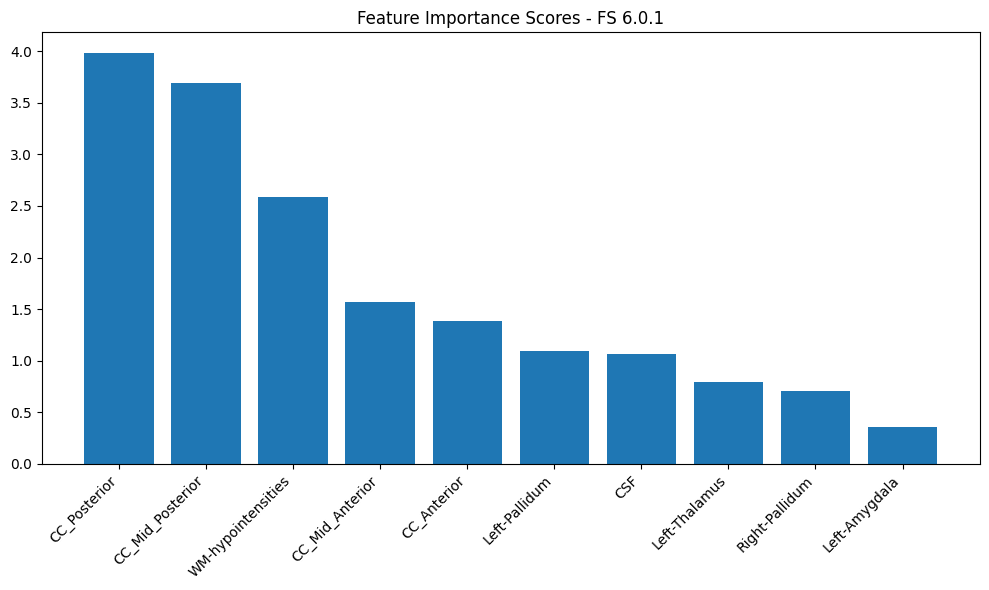

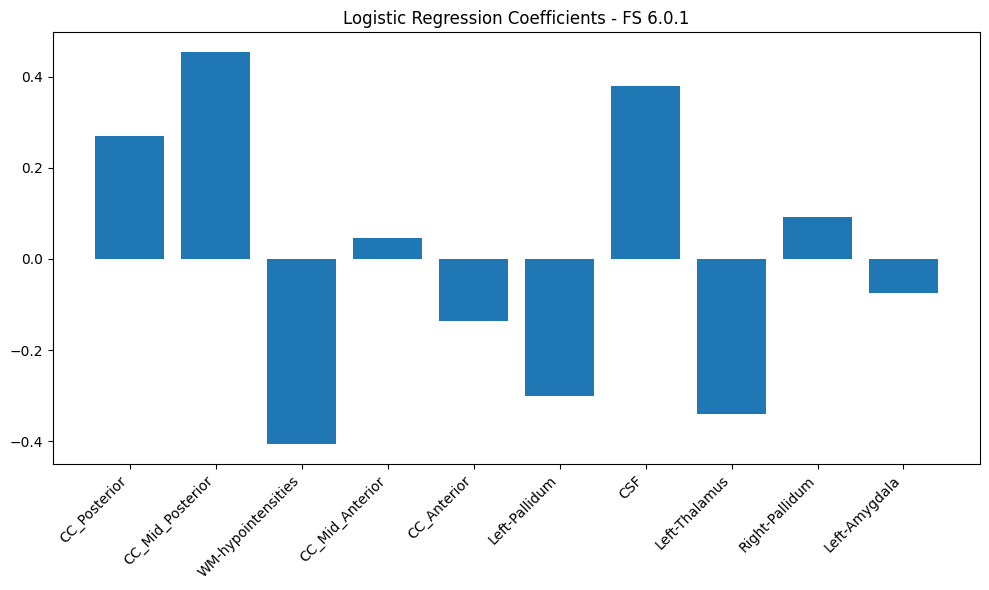


FS 7.4.1 cross:
Cross-validated ROC-AUC: 0.410 ± 0.094

Top 10 most important features:
               feature  f_score  coefficient
1  Left-Accumbens-area 3.045993    -0.641261
7     CC_Mid_Posterior 2.628668     0.633468
6         CC_Posterior 2.551414     0.066830
8          CC_Anterior 2.377584     0.112455
5   WM-hypointensities 2.132655    -0.536121
0        Left-Amygdala 1.874496    -0.090670
3       Right-Thalamus 1.867374    -0.580772
4    Right-Hippocampus 1.325177    -0.454662
9       SubCortGrayVol 1.208862     0.819914
2                  CSF 1.161353     0.442210


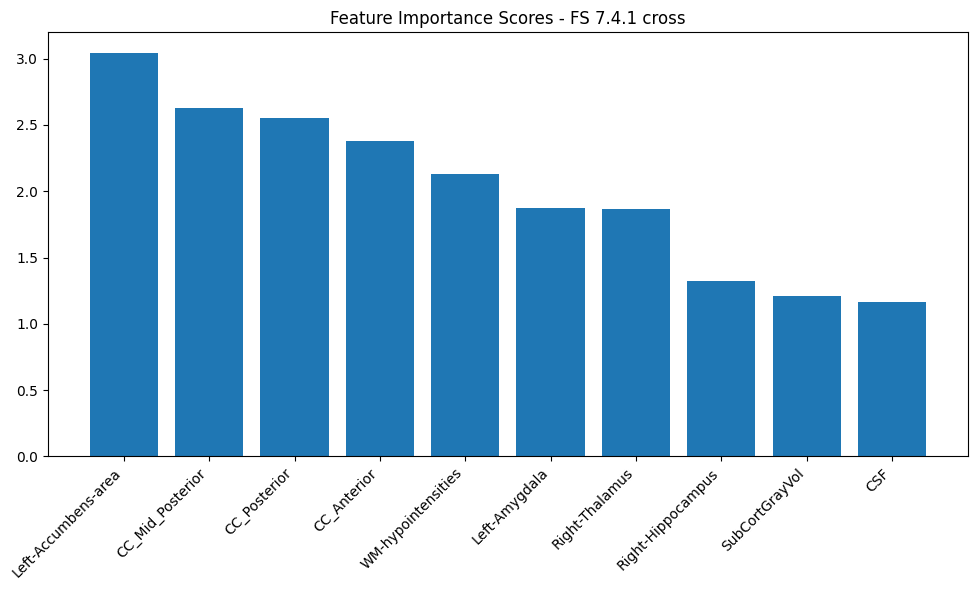

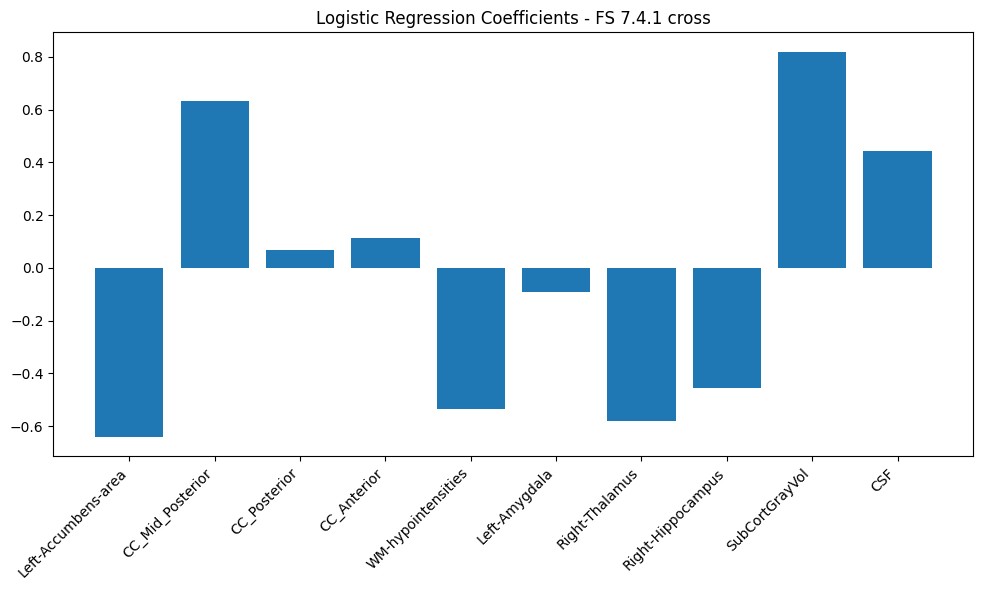


FS 7.4.1 long:
Cross-validated ROC-AUC: 0.451 ± 0.073

Top 10 most important features:
                    feature  f_score  coefficient
1             Left-Amygdala 3.062313    -0.253101
7               CC_Anterior 2.321812     0.448783
6          CC_Mid_Posterior 2.168723     0.449340
5              CC_Posterior 2.136999     0.220617
0             Left-Pallidum 2.128163    -0.171794
4        WM-hypointensities 2.042074    -0.023277
9  rhCerebralWhiteMatterVol 1.582250    -0.850836
2            Right-Thalamus 1.510742    -0.274426
8        BrainSegVolNotVent 1.474254     0.380402
3         Right-Hippocampus 1.444905    -0.203691


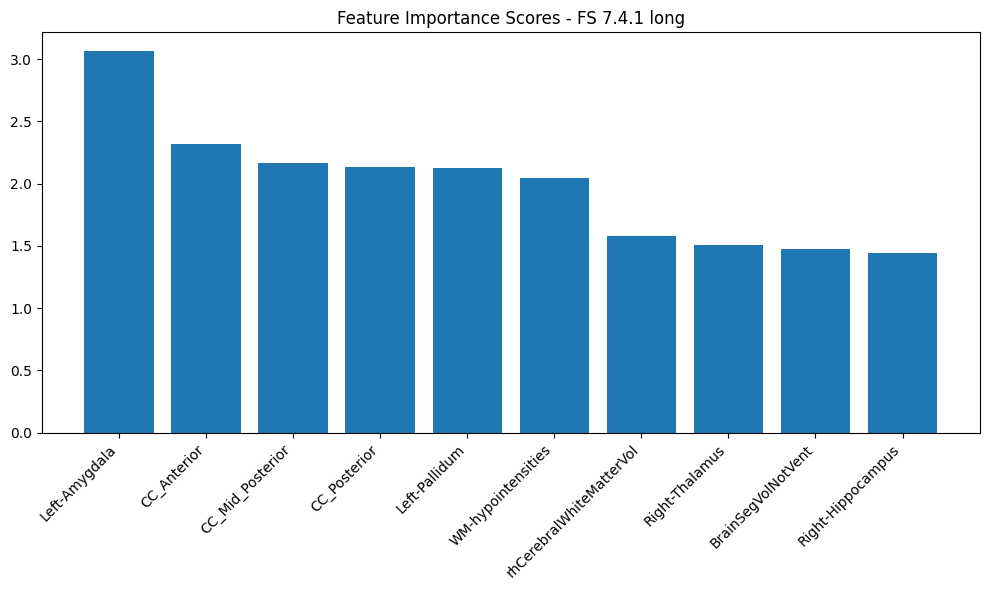

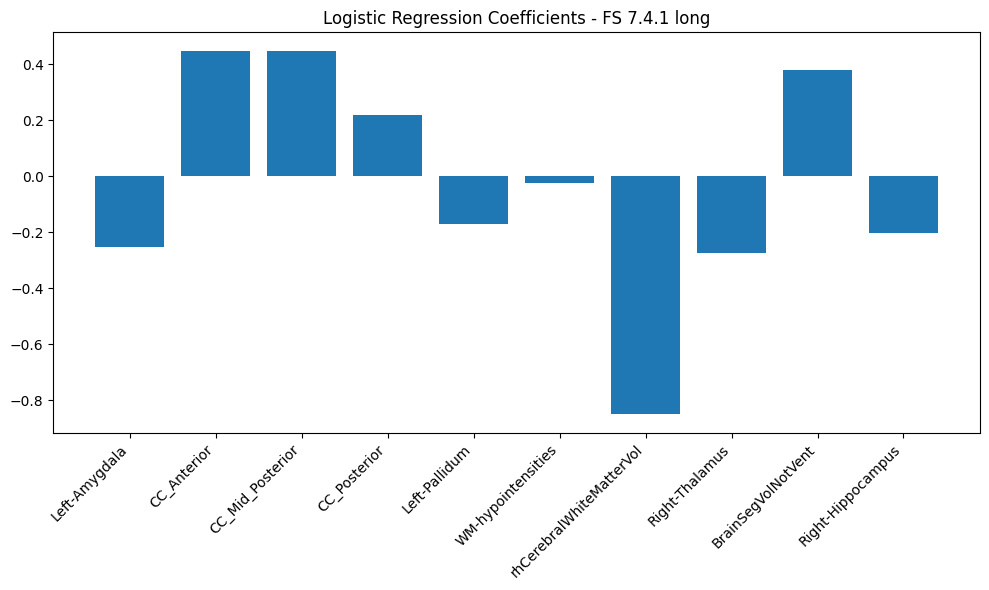

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def improved_sparse_group_analysis(df, k=10, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Improved analysis with feature selection and better convergence handling
    
    Parameters:
    df: DataFrame with brain regions
    k: Number of features to select (default=10)
    skip_cols: Columns to exclude from analysis
    
    Returns:
    dict with results and selected features
    """
    # Prepare data
    features = [col for col in df.columns if col not in skip_cols]
    X = df[features].values
    y = (df['Group'] == 'IBS').astype(int)
    
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(f_classif, k=k)),
        ('classifier', LogisticRegressionCV(
            penalty='l1',
            solver='liblinear',
            cv=5,
            max_iter=1000,
            random_state=42
        ))
    ])
    
    # Fit pipeline
    pipeline.fit(X, y)
    
    # Get selected features and their scores
    selected_mask = pipeline.named_steps['feature_selection'].get_support()
    selected_features = np.array(features)[selected_mask]
    feature_scores = pipeline.named_steps['feature_selection'].scores_[selected_mask]
    
    # Get coefficients for selected features
    coefficients = pipeline.named_steps['classifier'].coef_[0]
    
    # Combine into DataFrame
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'f_score': feature_scores,
        'coefficient': coefficients
    }).sort_values('f_score', ascending=False)
    
    # Calculate cross-validated performance
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
    
    return {
        'cv_scores': cv_scores,
        'mean_auc': cv_scores.mean(),
        'std_auc': cv_scores.std(),
        'feature_importance': feature_importance
    }

# Run analysis for each version
print("Improved Analysis Results:")
for name, df in [
    ("FS 6.0.1", df_fs6_cross_etiv_normalized),
    ("FS 7.4.1 cross", df_fs7_cross_etiv_normalized),
    ("FS 7.4.1 long", df_fs7_long_etiv_normalized)
]:
    print(f"\n{name}:")
    results = improved_sparse_group_analysis(df)
    
    print(f"Cross-validated ROC-AUC: {results['mean_auc']:.3f} ± {results['std_auc']:.3f}")
    print("\nTop 10 most important features:")
    print(results['feature_importance'].head(10))
    
    # Additional visualization
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(results['feature_importance'])), 
            results['feature_importance']['f_score'])
    plt.xticks(range(len(results['feature_importance'])), 
               results['feature_importance']['feature'], 
               rotation=45, ha='right')
    plt.title(f'Feature Importance Scores - {name}')
    plt.tight_layout()
    plt.show()
    
    # Plot coefficient values
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(results['feature_importance'])), 
            results['feature_importance']['coefficient'])
    plt.xticks(range(len(results['feature_importance'])), 
               results['feature_importance']['feature'], 
               rotation=45, ha='right')
    plt.title(f'Logistic Regression Coefficients - {name}')
    plt.tight_layout()
    plt.show()


To evaluate the discriminative power of brain volumetric differences between IBS patients and healthy controls (HC) across FreeSurfer versions (6.0.1, 7.4.1 cross-sectional, and 7.4.1 longitudinal), we employed a machine learning approach combining feature selection and logistic regression. The analysis pipeline included standardization of features, selection of the most informative brain regions using F-scores, and L1-regularized logistic regression with cross-validation to assess classification performance. This approach was chosen to handle the high-dimensional nature of brain volume data while identifying the most relevant anatomical features. Results showed that none of the FreeSurfer versions achieved above-chance classification performance (ROC-AUC: FS 6.0.1 = 0.423 ± 0.132; FS 7.4.1 cross = 0.410 ± 0.094; FS 7.4.1 long = 0.451 ± 0.073), indicating that brain volume differences alone are insufficient to reliably distinguish between IBS and HC groups. While the FS 7.4.1 longitudinal pipeline demonstrated slightly better and more stable performance, all versions consistently identified corpus callosum regions, white matter hypointensities, and certain subcortical structures (amygdala, thalamus) as potentially relevant features, suggesting these regions might warrant targeted investigation in future studies using additional imaging metrics beyond volumetric measures.

In [105]:
# Create a function to generate a LaTeX table comparing the normalized volumes 
# between FS 7.4.1 cross-sectional and FS 7.4.1 longitudinal stream, grouped by HC and IBS

def create_comparison_table(df7_cross, df7_long):
    # Skip these columns in comparison
    skip_cols = ['Subject', 'Group', 'eTIV']
    
    # Initialize lists to store results
    rows = []
    
    for col in df7_cross.columns:
        if col not in skip_cols:
            # Calculate stats for HC group
            hc_7_cross_stats = df7_cross[df7_cross['Group'] == 'HC'][col].agg(['mean', 'std'])
            hc_7_long_stats = df7_long[df7_long['Group'] == 'HC'][col].agg(['mean', 'std'])
            
            # Calculate stats for IBS group
            ibs_7_cross_stats = df7_cross[df7_cross['Group'] == 'IBS'][col].agg(['mean', 'std'])
            ibs_7_long_stats = df7_long[df7_long['Group'] == 'IBS'][col].agg(['mean', 'std'])
            
            # Add row to results
            rows.append([
                col,
                f"{hc_7_cross_stats['mean']:.6f}",
                f"{hc_7_cross_stats['std']:.6f}",
                f"{ibs_7_cross_stats['mean']:.6f}",
                f"{ibs_7_cross_stats['std']:.6f}",
                f"{hc_7_long_stats['mean']:.6f}",
                f"{hc_7_long_stats['std']:.6f}",
                f"{ibs_7_long_stats['mean']:.6f}",
                f"{ibs_7_long_stats['std']:.6f}"
            ])
    
    # Create LaTeX table
    latex_table = "\\begin{table}[H]\n\\setlength{\\tabcolsep}{5pt}\n\\scriptsize\n\\centering\n\\caption{Comparison of Brain Region Volumes in Bergen cohort, FS 7.4.1 cross-sectional vs. FS 7.4.1 longitudinal stream}\n"
    latex_table += "\\begin{tabular}{l|cc|cc|cc|cc}\n\\hline\n"
    latex_table += " & \\multicolumn{4}{c|}{FS 7.4.1 cross-sectional} & \\multicolumn{4}{c}{FS 7.4.1 longitudinal stream} \\\\\n"
    latex_table += " & \\multicolumn{2}{c|}{HC (N=29)} & \\multicolumn{2}{c|}{IBS (N=49)} & \\multicolumn{2}{c|}{HC (N=29)} & \\multicolumn{2}{c}{IBS (N=49)} \\\\\n"
    latex_table += "Brain Region & Mean & SD & Mean & SD & Mean & SD & Mean & SD \\\\\n\\hline\n"
    
    for row in rows:
        latex_table += " & ".join(row) + " \\\\\n"
    
    latex_table += "\\hline\n\\end{tabular}\n\\label{tab:version_comparison}\n\\end{table}"
    
    return latex_table

# Generate the table
table = create_comparison_table(df_fs7_cross_etiv_normalized, df_fs7_long_etiv_normalized)
print(table)

\begin{table}[H]
\setlength{\tabcolsep}{5pt}
\scriptsize
\centering
\caption{Comparison of Brain Region Volumes in Bergen cohort, FS 7.4.1 cross-sectional vs. FS 7.4.1 longitudinal stream}
\begin{tabular}{l|cc|cc|cc|cc}
\hline
 & \multicolumn{4}{c|}{FS 7.4.1 cross-sectional} & \multicolumn{4}{c}{FS 7.4.1 longitudinal stream} \\
 & \multicolumn{2}{c|}{HC (N=29)} & \multicolumn{2}{c|}{IBS (N=49)} & \multicolumn{2}{c|}{HC (N=29)} & \multicolumn{2}{c}{IBS (N=49)} \\
Brain Region & Mean & SD & Mean & SD & Mean & SD & Mean & SD \\
\hline
Left-Cerebellum-White-Matter & 0.010603 & 0.000932 & 0.010607 & 0.001027 & 0.010888 & 0.001076 & 0.010688 & 0.001044 \\
Left-Cerebellum-Cortex & 0.038066 & 0.003526 & 0.038056 & 0.003684 & 0.037438 & 0.003633 & 0.037232 & 0.003575 \\
Left-Thalamus & 0.005236 & 0.000522 & 0.005114 & 0.000458 & 0.005385 & 0.000517 & 0.005262 & 0.000473 \\
Left-Caudate & 0.002346 & 0.000283 & 0.002317 & 0.000294 & 0.002506 & 0.000313 & 0.002474 & 0.000315 \\
Left-Putamen & 0.00

In [106]:
# Save the table to a LaTeX file
with open('../latex/tables/fs7_cross_vs_fs7_long_version_comparison_table.tex', 'w') as f:
    f.write(table)


In [107]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

print(f"Mean eTIV FS 7.4.1 cross-sectional:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS 7.4.1 cross-sectional:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].std()}")
print(f"\nMean eTIV FS 7.4.1 longitudinal stream:\n{df_fs7_long_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS 7.4.1 longitudinal stream:\n{df_fs7_long_etiv_normalized.groupby('Group')['eTIV'].std()}")


Mean eTIV FS 7.4.1 cross-sectional:
Group
HC    1494273.2
IBS   1462310.8
Name: eTIV, dtype: float64

Std eTIV FS 7.4.1 cross-sectional:
Group
HC    171472.3
IBS   144145.1
Name: eTIV, dtype: float64

Mean eTIV FS 7.4.1 longitudinal stream:
Group
HC    1492943.7
IBS   1464197.2
Name: eTIV, dtype: float64

Std eTIV FS 7.4.1 longitudinal stream:
Group
HC    171477.7
IBS   143328.1
Name: eTIV, dtype: float64


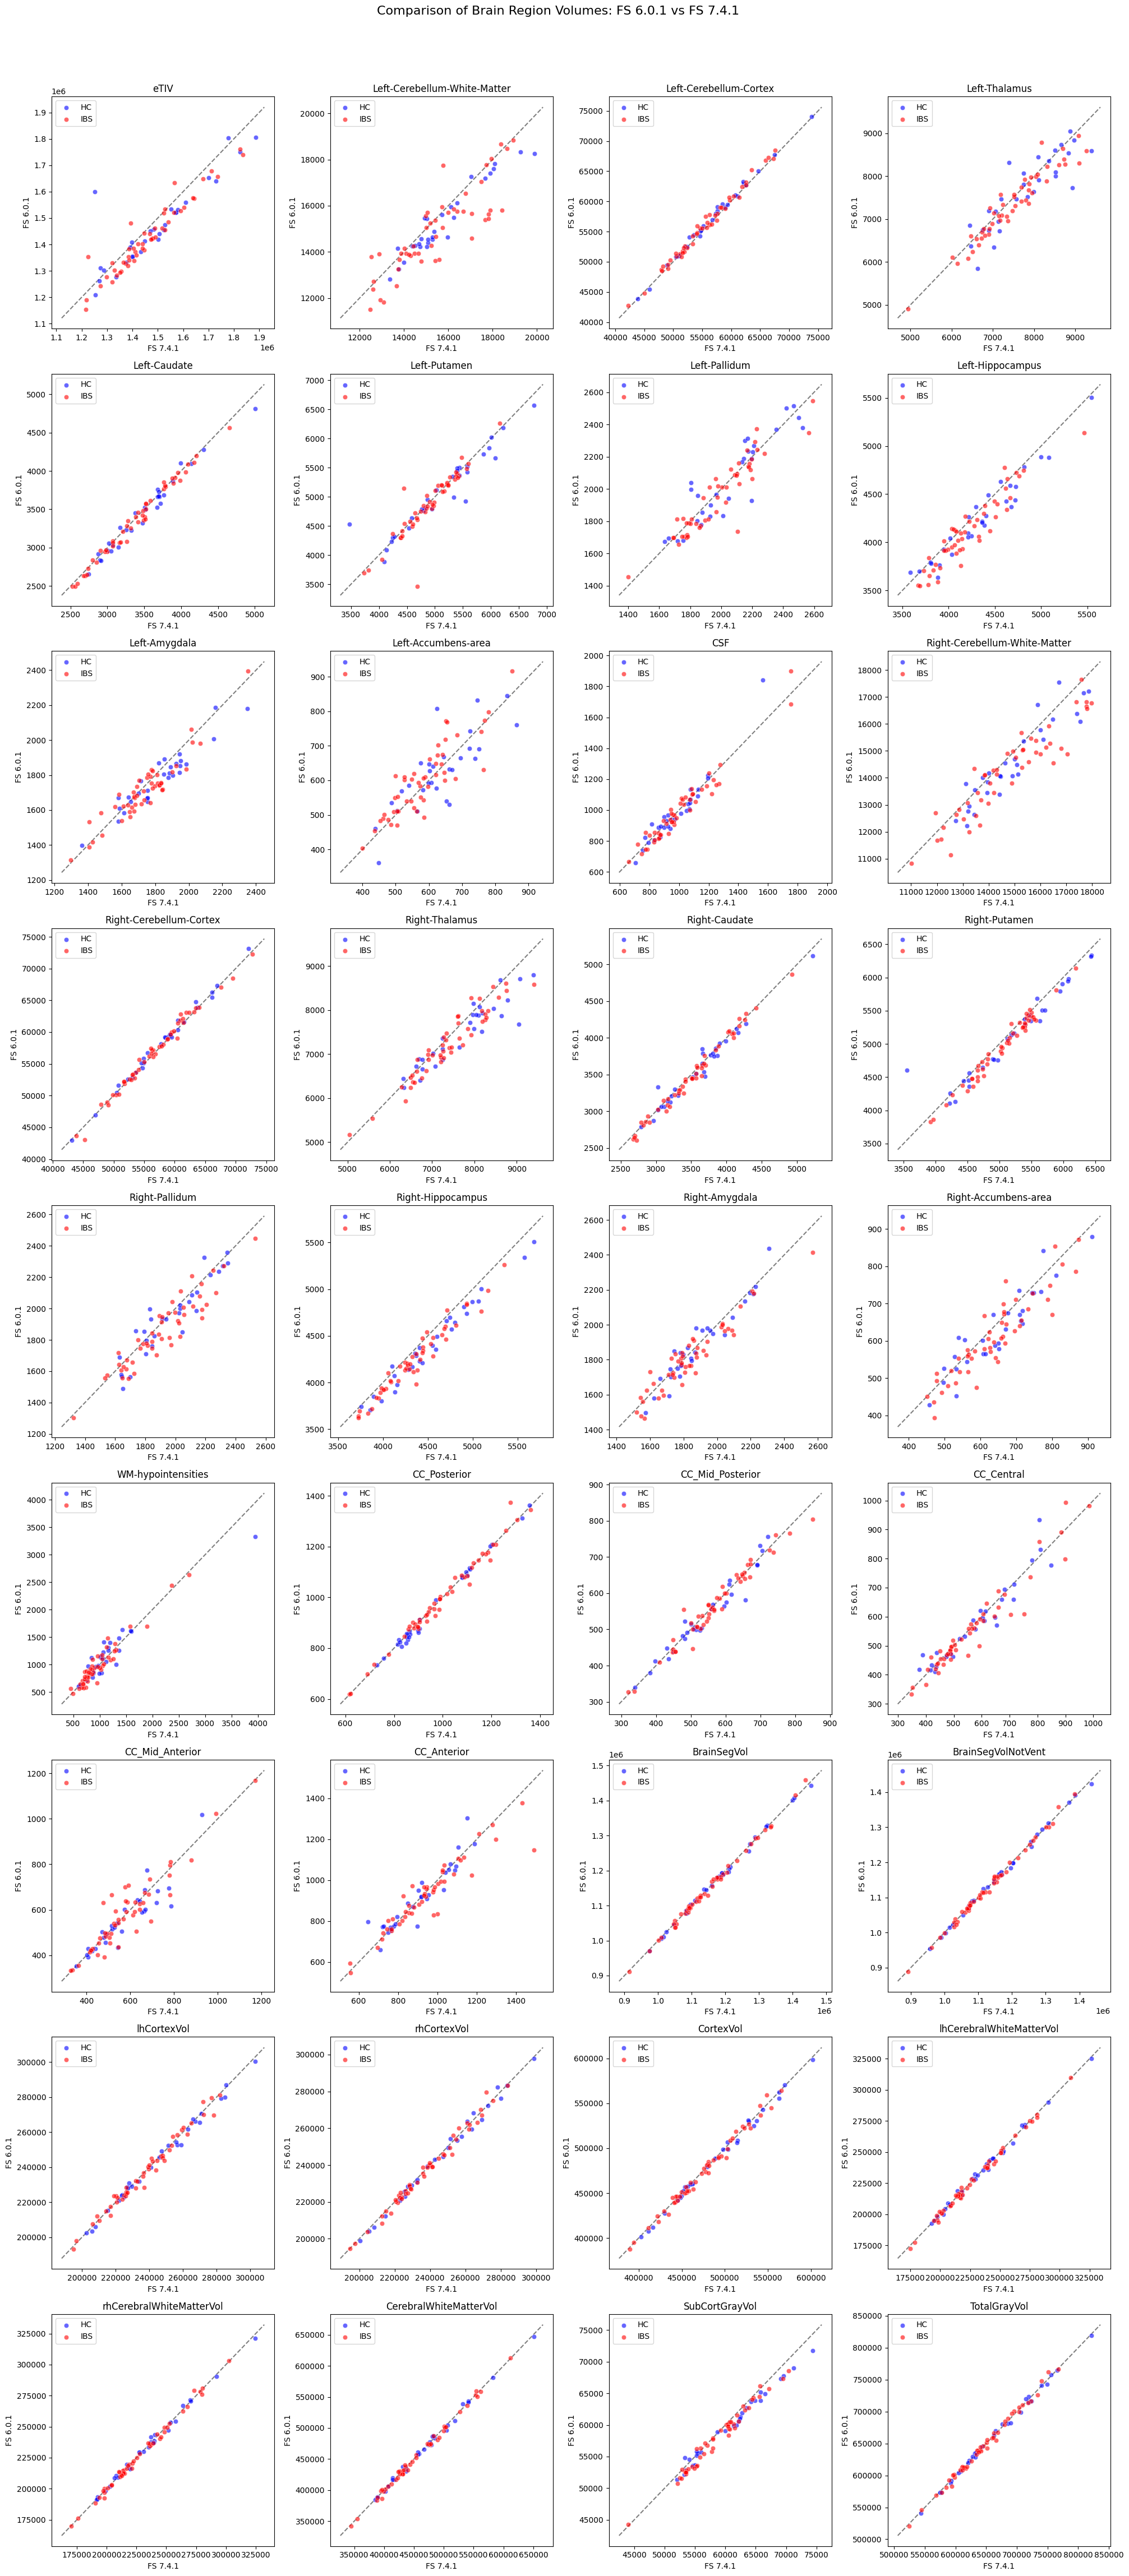

In [108]:
# Set up the plotting parameters
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Get list of brain regions (excluding non-volume columns)
brain_regions = [col for col in df_fs6_cross.columns 
                if col not in ['Subject', 'Group']]

n_plots_per_row = 4
# Calculate number of rows needed
n_rows = (len(brain_regions) + n_plots_per_row - 1) // n_plots_per_row

# Create a large figure
fig = plt.figure(figsize=(20, 5*n_rows))
gs = GridSpec(n_rows, n_plots_per_row, figure=fig)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Create scatter plot for each brain region
for idx, region in enumerate(brain_regions):
    row = idx // n_plots_per_row
    col = idx % n_plots_per_row
    ax = fig.add_subplot(gs[row, col])
    
    # Plot HC group
    sns.scatterplot(data=df_fs6_cross[df_fs6_cross['Group']=='HC'], 
                   x=df_fs7_cross[df_fs7_cross['Group']=='HC'][region],
                   y=df_fs6_cross[df_fs6_cross['Group']=='HC'][region],
                   label='HC', color='blue', alpha=0.6)
    
    # Plot IBS group
    sns.scatterplot(data=df_fs6_cross[df_fs6_cross['Group']=='IBS'],
                   x=df_fs7_cross[df_fs7_cross['Group']=='IBS'][region],
                   y=df_fs6_cross[df_fs6_cross['Group']=='IBS'][region],
                   label='IBS', color='red', alpha=0.6)
    
    # Add identity line
    lims = [
        min(ax.get_xlim()[0], ax.get_ylim()[0]),
        max(ax.get_xlim()[1], ax.get_ylim()[1]),
    ]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0)
    
    # Labels and title
    ax.set_xlabel('FS 7.4.1')
    ax.set_ylabel('FS 6.0.1')
    ax.set_title(region)
    ax.legend()

plt.suptitle('Comparison of Brain Region Volumes: FS 6.0.1 vs FS 7.4.1', 
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

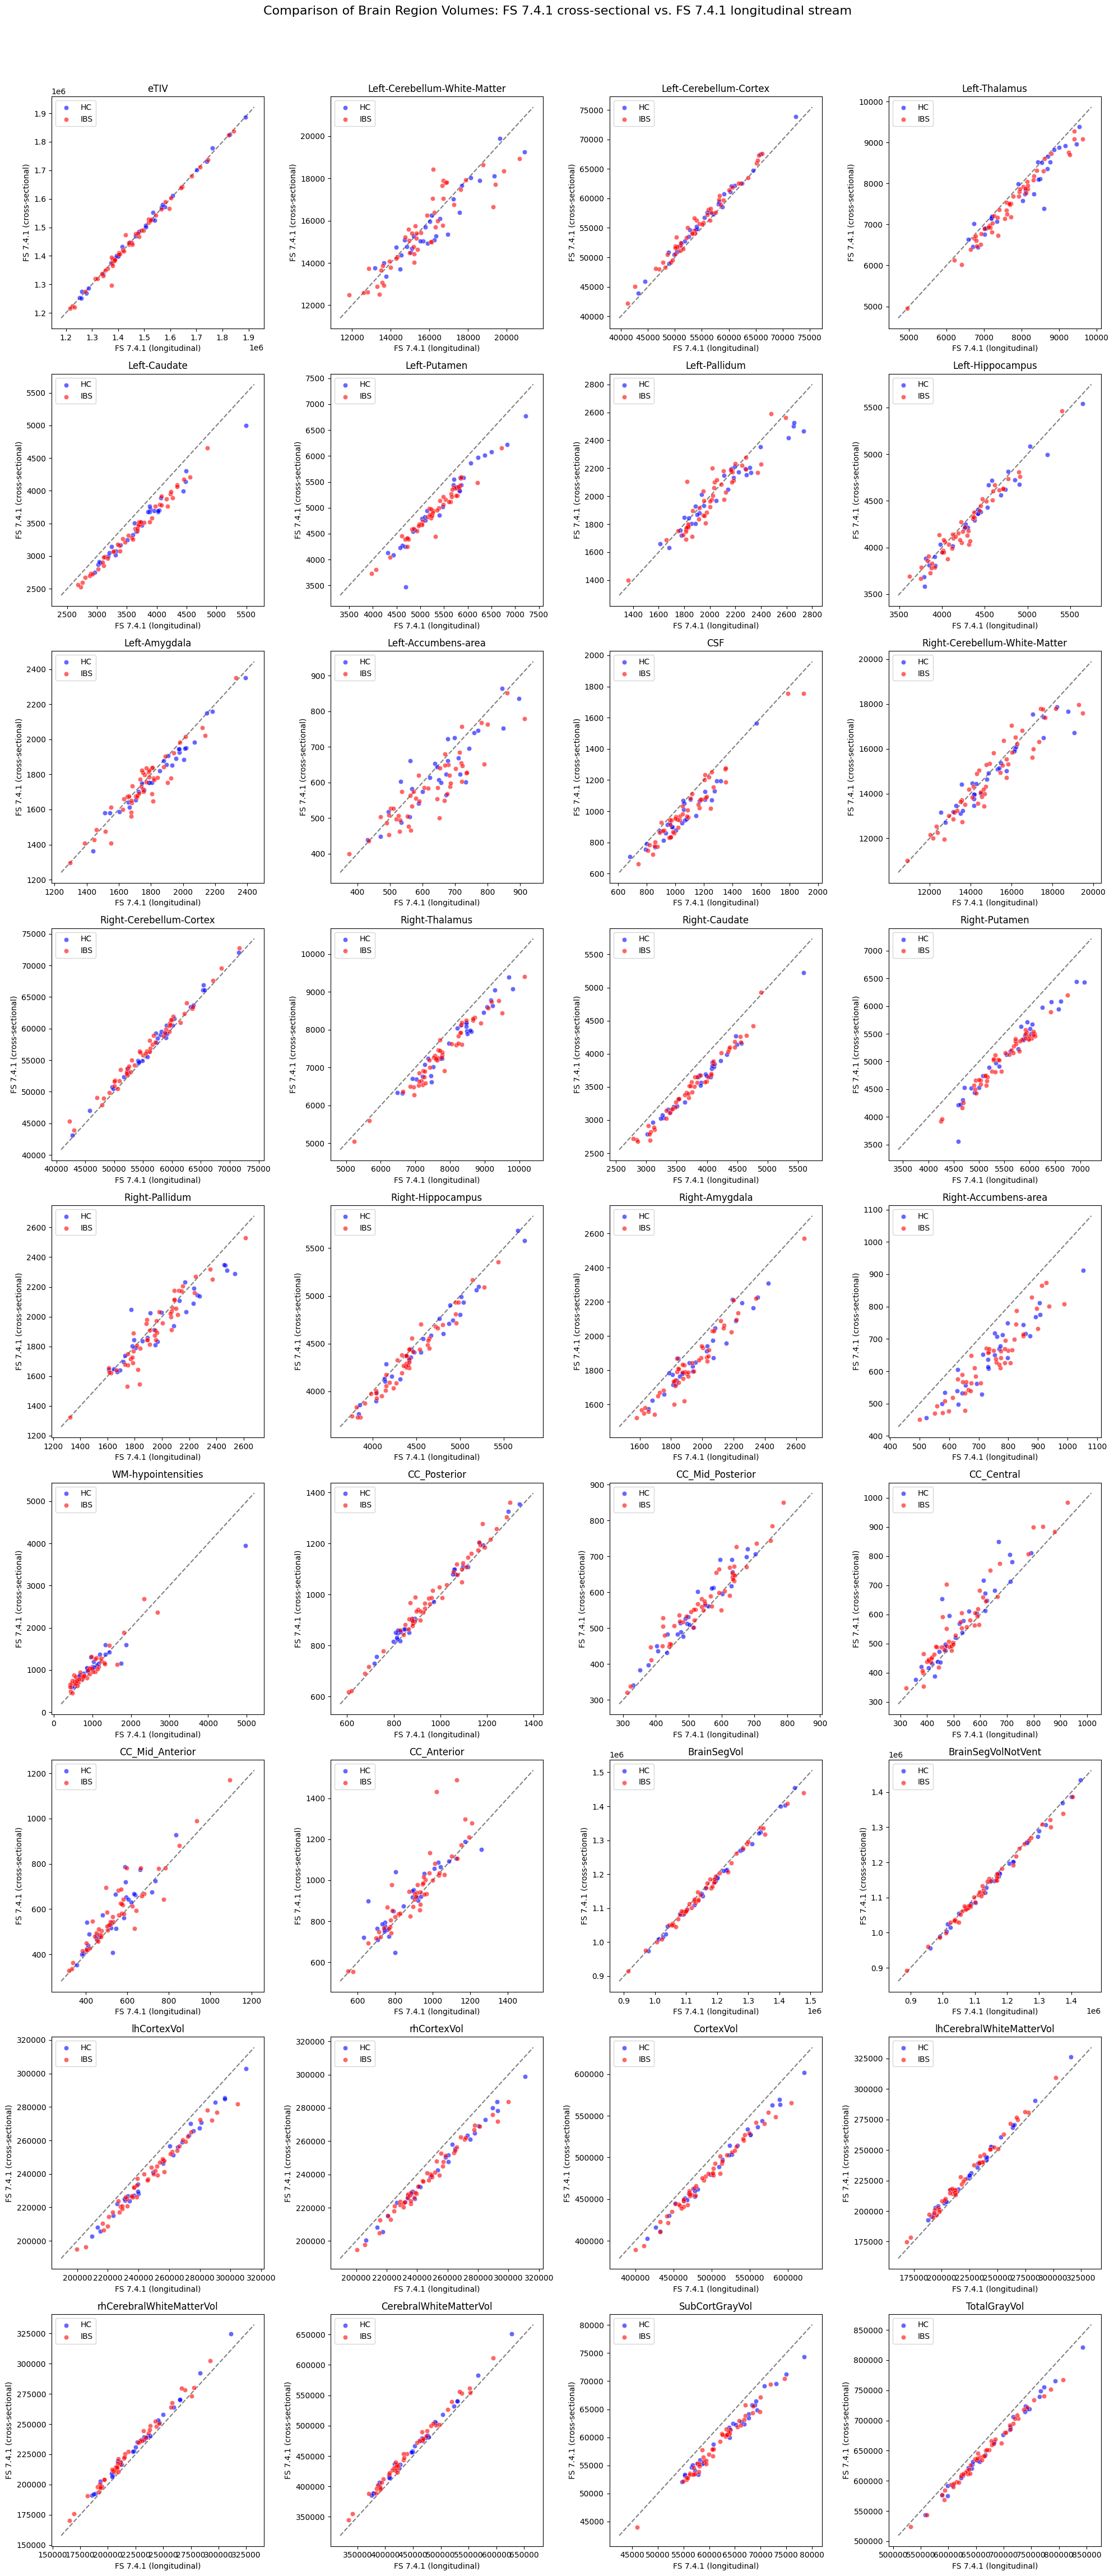

In [109]:
# Set up the plotting parameters
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Get list of brain regions (excluding non-volume columns)
brain_regions = [col for col in df_fs7_cross.columns 
                if col not in ['Subject', 'Group']]

n_plots_per_row = 4
# Calculate number of rows needed
n_rows = (len(brain_regions) + n_plots_per_row - 1) // n_plots_per_row

# Create a large figure
fig = plt.figure(figsize=(20, 5*n_rows))
gs = GridSpec(n_rows, n_plots_per_row, figure=fig)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Create scatter plot for each brain region
for idx, region in enumerate(brain_regions):
    row = idx // n_plots_per_row
    col = idx % n_plots_per_row
    ax = fig.add_subplot(gs[row, col])
    
    # Plot HC group
    sns.scatterplot(data=df_fs7_cross[df_fs7_cross['Group']=='HC'], 
                   x=df_fs7_long[df_fs7_long['Group']=='HC'][region],
                   y=df_fs7_cross[df_fs7_cross['Group']=='HC'][region],
                   label='HC', color='blue', alpha=0.6)
    
    # Plot IBS group
    sns.scatterplot(data=df_fs7_cross[df_fs7_cross['Group']=='IBS'],
                   x=df_fs7_long[df_fs7_long['Group']=='IBS'][region],
                   y=df_fs7_cross[df_fs7_cross['Group']=='IBS'][region],
                   label='IBS', color='red', alpha=0.6)
    
    # Add identity line
    lims = [
        min(ax.get_xlim()[0], ax.get_ylim()[0]),
        max(ax.get_xlim()[1], ax.get_ylim()[1]),
    ]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0)
    
    # Labels and title
    ax.set_xlabel('FS 7.4.1 (longitudinal)')
    ax.set_ylabel('FS 7.4.1 (cross-sectional)')
    ax.set_title(region)
    ax.legend()

plt.suptitle('Comparison of Brain Region Volumes: FS 7.4.1 cross-sectional vs. FS 7.4.1 longitudinal stream', 
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()